**Import the necessary packages**



In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load the File**


In [39]:
file_path = './creditcard.csv'
df = pd.read_csv(file_path)

**Data Preprocessing**


**Display the first few rows of the DataFrame**


In [40]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [41]:
df.shape


(105067, 31)

In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105067 entries, 0 to 105066
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    105067 non-null  int64  
 1   V1      105067 non-null  float64
 2   V2      105067 non-null  float64
 3   V3      105067 non-null  float64
 4   V4      105067 non-null  float64
 5   V5      105067 non-null  float64
 6   V6      105067 non-null  float64
 7   V7      105067 non-null  float64
 8   V8      105067 non-null  float64
 9   V9      105067 non-null  float64
 10  V10     105067 non-null  float64
 11  V11     105067 non-null  float64
 12  V12     105067 non-null  float64
 13  V13     105067 non-null  float64
 14  V14     105067 non-null  float64
 15  V15     105067 non-null  float64
 16  V16     105067 non-null  float64
 17  V17     105067 non-null  float64
 18  V18     105067 non-null  float64
 19  V19     105067 non-null  float64
 20  V20     105067 non-null  float64
 21  V21     10

In [43]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,105067.000000,...,105067.000000,105067.000000,105067.000000,105066.000000,105066.000000,105066.000000,105066.000000,105066.000000,105066.000000,105066.000000
mean,43680.301455,-0.258318,-0.029705,0.683599,0.156974,-0.283527,0.098924,-0.116800,0.057275,-0.050479,...,-0.029851,-0.105483,-0.037181,0.009834,0.133576,0.026062,0.001671,0.001795,96.626111,0.002208
std,17527.890732,1.851801,1.650087,1.319498,1.345212,1.351589,1.301365,1.214204,1.236547,1.112787,...,0.744325,0.639981,0.626223,0.595669,0.440315,0.491947,0.392645,0.321359,262.315215,0.046939
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,33975.500000,-1.024715,-0.598212,0.178273,-0.714182,-0.907139,-0.644227,-0.606695,-0.135125,-0.696261,...,-0.223703,-0.531229,-0.177131,-0.323208,-0.130802,-0.323481,-0.061425,-0.005146,7.160000,0.000000
50%,45510.000000,-0.260627,0.075873,0.759148,0.184867,-0.318318,-0.153233,-0.072970,0.077001,-0.118121,...,-0.056348,-0.081414,-0.049651,0.065708,0.172075,-0.069141,0.010581,0.023346,25.500000,0.000000
75%,57712.000000,1.154766,0.735425,1.385199,1.026157,0.245212,0.494042,0.409551,0.368539,0.549453,...,0.121112,0.315794,0.080780,0.407051,0.421563,0.295664,0.084462,0.076727,87.540000,0.000000
max,69350.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


**Handing missing values using SimpleImputer**


In [44]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with the strategy to replace missing values with the mean

imputer = SimpleImputer(strategy='mean')
# Fit the imputer on the DataFrame and transform the data to fill missing values
# Convert the result back to a DataFrame with the original columns
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Missing values after imputation:\n", df_imputed.isnull().sum())

Missing values after imputation:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Determine number of fraud cases in dataset**






In [45]:
fraud = df_imputed[df_imputed['Class'] == 1]
valid = df_imputed[df_imputed['Class'] == 0]
outlierFraction = len(fraud) / float(len(valid))

print(f'Outlier Fraction: {outlierFraction}')
print(f'Fraud Cases: {len(fraud)}')
print(f'Valid Transactions: {len(valid)}')

Outlier Fraction: 0.002213022492702749
Fraud Cases: 232
Valid Transactions: 104834


In [46]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,232.000000
mean,115.520474
std,253.721393
min,0.000000
25%,1.000000
50%,7.595000
75%,99.990000
max,1809.680000


**Printing amount details of normal transactions**


In [47]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,104834.000000
mean,96.584297
std,262.333583
min,0.000000
25%,7.190000
50%,25.540000
75%,87.440000
max,19656.530000


**Correlation matrix**


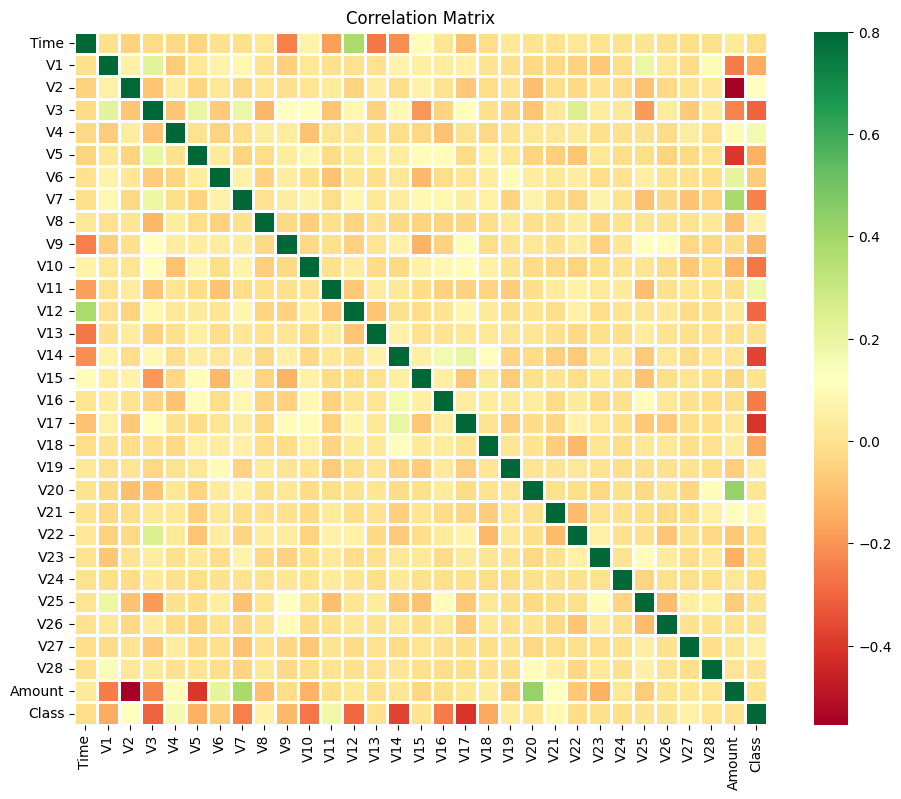

In [48]:
# Calculate the correlation matrix
corrmat = df.corr()

# Create a figure with a specified size
fig = plt.figure(figsize=(12, 9))

# Create a heatmap of the correlation matrix with specified figure size
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdYlGn',linewidths=0.75, linecolor='white')
plt.title('Correlation Matrix')

# Show the plot
plt.show()

### Dataset Sub-sampling  
Since the original dataset exceeds the required range (200–5000 instances), we randomly sampled **5000 rows** while preserving the class distribution. All further steps use this reduced subset.

In [49]:
# Reduce dataset to 5000 rows while keeping class ratio
df_imputed = df_imputed.sample(n=5000, random_state=42).reset_index(drop=True)
print('Reduced dataset shape:', df_imputed.shape)
print('Class counts after sampling:\n', df_imputed['Class'].value_counts())

Reduced dataset shape: (5000, 31)
Class counts after sampling:
 Class
0.0    4994
1.0       6
Name: count, dtype: int64


In [50]:
# Features & target after sampling
X = df_imputed.drop(['Class'], axis=1)
Y = df_imputed['Class']
print('X shape:', X.shape, '  Y shape:', Y.shape)

X shape: (5000, 30)   Y shape: (5000,)


In [51]:
# Ensure the target variable is encoded as integers (0 and 1)
Y = Y.astype(int)

# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y

**Train Test and Split**

In [52]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.3, random_state=42)
print("Train shape:", xTrain.shape, yTrain.shape)
print("Test shape:", xTest.shape, yTest.shape)


Train shape: (3500, 30) (3500,)
Test shape: (1500, 30) (1500,)


In [53]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(xTrain)
X_test_imputed = imputer.transform(xTest)

print("Missing values in training set:", X_train_imputed.shape)
print("Missing values in test set:", X_test_imputed.shape)


Missing values in training set: (3500, 30)
Missing values in test set: (1500, 30)


### Pre-processed Data Ready for ML  
- Dataset reduced to 5000 instances (preserving class ratio).  
- Missing values imputed (mean strategy).  
- Training set balanced with SMOTE (6998 samples).  
- No scaling applied (tree-based algorithms will be used).  
- X_train_res, y_train_res, X_test_imputed, y_test are ready for modeling.

In [54]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
import numpy as np # Ensure numpy is available

# Count the number of minority samples (assuming class 1 is the minority class)
minority_class_label = 1
num_minority_samples_in_train = np.sum(yTrain == minority_class_label)

# Determine the k_neighbors value for SMOTE or switch to RandomOverSampler
# SMOTE requires k_neighbors <= num_minority_samples - 1.
# Also, k_neighbors must be at least 1.
# If num_minority_samples_in_train is 1, k_neighbors would need to be 0, which is not allowed.
# So, if num_minority_samples_in_train <= 1, SMOTE cannot be applied effectively.

if num_minority_samples_in_train <= 1:
    print(f"Warning: Only {num_minority_samples_in_train} minority sample(s) found in training set. ")
    print(f"SMOTE cannot be applied with k_neighbors={4} (requires at least 5 samples for k=4, or 2 samples for k=1). ")
    print(f"Using RandomOverSampler instead.")
    oversampler = RandomOverSampler(random_state=42)
else:
    # If there are enough samples for SMOTE
    # Ensure k_neighbors is not greater than (number of minority samples - 1)
    # The default k_neighbors for SMOTE is 5, so min(4, ...) here corresponds to k_neighbors + 1 for SMOTE.
    # SMOTE's k_neighbors parameter is the number of neighbors to consider.
    # It internally uses k+1 samples to form the neighborhood.
    effective_k_neighbors = min(4, num_minority_samples_in_train - 1)

    # Ensure k_neighbors is at least 1, which is the minimum allowed by SMOTE
    if effective_k_neighbors < 1:
        # This branch should ideally not be reached if num_minority_samples_in_train > 1
        # However, as a safeguard, if effective_k_neighbors calculates to less than 1,
        # we fall back to RandomOverSampler or set it to 1 and proceed if possible.
        print(f"Warning: Not enough minority samples ({num_minority_samples_in_train}) for SMOTE even with k_neighbors=1. ")
        print(f"Using RandomOverSampler instead.")
        oversampler = RandomOverSampler(random_state=42)
    else:
        print(f"Applying SMOTE with k_neighbors={effective_k_neighbors} (adapted due to low minority sample count).")
        oversampler = SMOTE(random_state=42, k_neighbors=effective_k_neighbors)

X_train_res, y_train_res = oversampler.fit_resample(X_train_imputed, yTrain)

print("Before oversampling - training set shape:", X_train_imputed.shape, yTrain.shape)
print("After oversampling - training set shape:", X_train_res.shape, y_train_res.shape)


Applying SMOTE with k_neighbors=4 (adapted due to low minority sample count).
Before oversampling - training set shape: (3500, 30) (3500,)
After oversampling - training set shape: (6990, 30) (6990,)


**Logistic Regression**


In [55]:
# Importing Logistic Regression Library
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test_imputed)

lr = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')
lr.fit(X_train_scaled, y_train_res)
yPred = lr.predict(X_test_scaled)

print("Logistic Regression with Improved Parameters")
print("Accuracy:", accuracy_score(yTest, yPred))
print("Classification Report:\n", classification_report(yTest, yPred))

Logistic Regression with Improved Parameters
Accuracy: 0.9973333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1499
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       1.00      1.00      1.00      1500



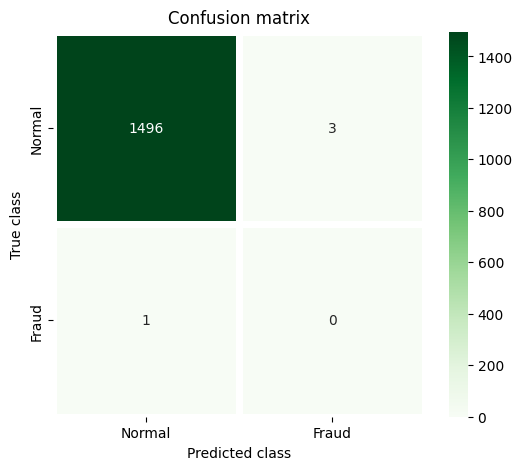

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix,
            xticklabels=LABELS,
            yticklabels=LABELS,
            annot=True,
            fmt="d",
            cmap='Greens',
            linewidths=5)
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

**SVM**


SVM (RBF) – Hyperparameters:
kernel='rbf', C=1.0, gamma='scale', class_weight='balanced'

Performance on 80/20 split:
Accuracy : 0.9993333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1499
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       1.00      1.00      1.00      1500



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


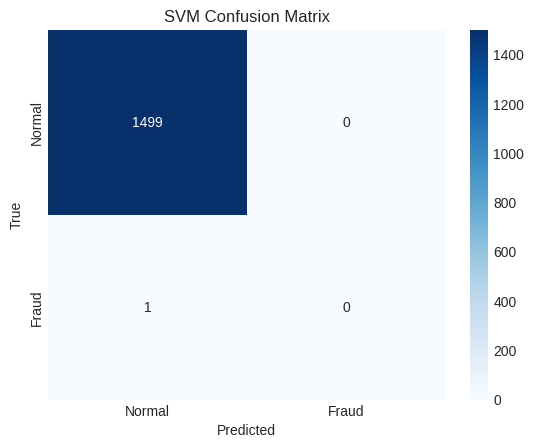

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled  = scaler.transform(X_test_imputed)

svm_model = SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        class_weight='balanced',
        random_state=42
)
svm_model.fit(X_train_scaled, y_train_res)

yPred = svm_model.predict(X_test_scaled)

print("SVM (RBF) – Hyperparameters:")
print("kernel='rbf', C=1.0, gamma='scale', class_weight='balanced'")
print("\nPerformance on 80/20 split:")
print("Accuracy :", accuracy_score(yTest, yPred))
print(classification_report(yTest, yPred))

LABELS = ['Normal', 'Fraud']
conf_mat = confusion_matrix(yTest, yPred)
sns.heatmap(conf_mat, xticklabels=LABELS, yticklabels=LABELS,
            annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix"); plt.ylabel('True'); plt.xlabel('Predicted')
plt.show()

SVM (RBF) – threshold 0.05
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1499
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       1.00      1.00      1.00      1500



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


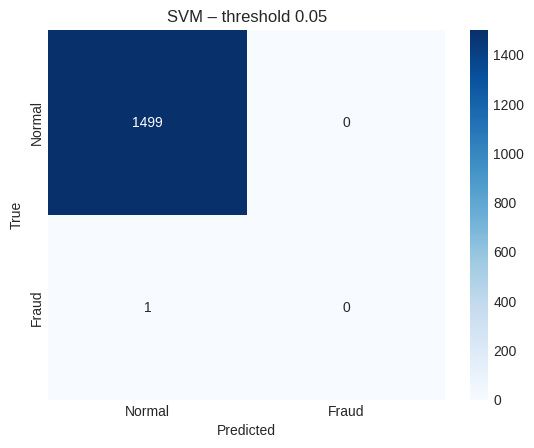

In [76]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled  = scaler.transform(X_test_imputed)

svm = SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced',
          probability=True, random_state=42)
svm.fit(X_train_scaled, y_train_res)

y_pred = (svm.predict_proba(X_test_scaled)[:, 1] >= 0.05).astype(int)

print("SVM (RBF) – threshold 0.05")
print(classification_report(yTest, y_pred))

sns.heatmap(confusion_matrix(yTest, y_pred),
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'],
            annot=True, fmt='d', cmap='Blues')
plt.title("SVM – threshold 0.05"); plt.ylabel('True'); plt.xlabel('Predicted')
plt.show()

# **Genetic Algorithm**

In [80]:
#Import libraries
import random
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

In [81]:
#Define the fitness function
def fitness_function(params):
    a, b, c = params

    # Penalize downward facing parabolas heavily (we want U-shapes, so a > 0)
    if a <= 0:
        return -float('inf')

    # Calculate y-values at key points
    x_points = np.linspace(-1, 1, 21)  # More points for better curvature measurement
    y_values = a * (x_points ** 2) + b * x_points + c

    # Calculate vertex coordinates
    vertex_x = -b / (2 * a)
    vertex_y = a * (vertex_x ** 2) + b * vertex_x + c

    # Calculate flatness measure:
    # 1. Minimize curvature (second derivative is 2a, so smaller a is flatter)
    # 2. Minimize variation from minimum point
    # 3. Ensure it's U-shaped (vertex near center)

    # Measure 1: Small a value (for flatness)
    a_penalty = abs(a) * 10

    # Measure 2: Low variance in y-values (flatness along the curve)
    y_variance = np.var(y_values)

    # Measure 3: Penalize if vertex is far from x=0 (center of our interval)
    vertex_offset_penalty = abs(vertex_x) * 5

    # Measure 4: Penalize asymmetry (difference between left and right sides)
    left_side = y_values[:10]
    right_side = y_values[11:]
    asymmetry_penalty = abs(np.mean(left_side) - np.mean(right_side)) * 2

    # Combined fitness (we want to maximize this, so use negative penalties)
    fitness = -(a_penalty + y_variance * 100 + vertex_offset_penalty + asymmetry_penalty)

    return fitness

In [82]:
#Genetic Algorithm Helper Functions
def create_initial_population(size, lower_bound, upper_bound):
    """Create initial population with random parameters"""
    population = []
    for _ in range(size):
        # Ensure a > 0 for U-shapes
        a = random.uniform(0.001, upper_bound)  # Small positive a for flatter curves
        b = random.uniform(lower_bound, upper_bound)
        c = random.uniform(lower_bound, upper_bound)
        individual = (a, b, c)
        population.append(individual)
    return population

def selection(population, fitnesses, tournament_size=3):
    """Tournament selection"""
    selected = []
    for _ in range(len(population)):
        # Randomly select tournament participants
        indices = random.sample(range(len(population)), tournament_size)
        tournament = [(population[i], fitnesses[i]) for i in indices]
        winner = max(tournament, key=lambda x: x[1])[0]
        selected.append(winner)
    return selected

def crossover(parent1, parent2, crossover_rate=0.8):
    """Blend crossover"""
    if random.random() > crossover_rate:
        return parent1, parent2

    alpha = random.random()
    child1 = tuple(alpha * p1 + (1 - alpha) * p2 for p1, p2 in zip(parent1, parent2))
    child2 = tuple(alpha * p2 + (1 - alpha) * p1 for p1, p2 in zip(parent1, parent2))
    return child1, child2

def mutation(individual, mutation_rate, lower_bound, upper_bound):
    """Gaussian mutation with bounds checking"""
    individual = list(individual)
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            # Gaussian mutation for fine-tuning
            mutation_amount = random.gauss(0, 0.1 * (upper_bound - lower_bound))
            individual[i] += mutation_amount

            # Special handling for 'a' parameter - keep it positive
            if i == 0:  # 'a' parameter
                individual[i] = max(0.001, individual[i])

            # Ensure bounds for all parameters
            individual[i] = max(min(individual[i], upper_bound), lower_bound)
    return tuple(individual)

In [83]:
#Main Genetic Algorithm Function
def genetic_algorithm(population_size, lower_bound, upper_bound, generations, mutation_rate):
    """Main genetic algorithm loop"""
    population = create_initial_population(population_size, lower_bound, upper_bound)

    # Prepare for plotting
    best_performers = []
    all_populations = []
    avg_fitness_history = []

    # Prepare for table
    table = PrettyTable()
    table.field_names = ["Generation", "Best a", "Best b", "Best c", "Best Fitness", "Avg Fitness"]

    print("Starting genetic algorithm...")
    for generation in range(generations):
        # Calculate fitness for all individuals
        fitnesses = [fitness_function(ind) for ind in population]
        avg_fitness = np.mean(fitnesses)
        avg_fitness_history.append(avg_fitness)

        # Store the best performer of the current generation
        best_index = np.argmax(fitnesses)
        best_individual = population[best_index]
        best_fitness = fitnesses[best_index]
        best_performers.append((best_individual, best_fitness))
        all_populations.append(population[:])

        # Add to table
        table.add_row([generation + 1,
                      f"{best_individual[0]:.6f}",
                      f"{best_individual[1]:.6f}",
                      f"{best_individual[2]:.6f}",
                      f"{best_fitness:.6f}",
                      f"{avg_fitness:.6f}"])

        # Selection
        selected = selection(population, fitnesses)

        # Crossover and Mutation
        next_population = []
        for i in range(0, len(selected) - 1, 2):
            parent1 = selected[i]
            parent2 = selected[i + 1]

            child1, child2 = crossover(parent1, parent2)

            next_population.append(mutation(child1, mutation_rate, lower_bound, upper_bound))
            next_population.append(mutation(child2, mutation_rate, lower_bound, upper_bound))

        # If odd number of selected, add the last one
        if len(selected) % 2 == 1:
            next_population.append(mutation(selected[-1], mutation_rate, lower_bound, upper_bound))

        # Elitism: Keep the best individual
        next_population[0] = best_individual

        # Update population
        population = next_population

        # Print progress every 10 generations
        if (generation + 1) % 10 == 0:
            print(f"Generation {generation + 1}/{generations} completed")

    print("\n" + "="*80)
    print("Genetic Algorithm Results:")
    print("="*80)
    print(table)

    return best_performers, all_populations, avg_fitness_history, population

In [84]:
#Set Parameters and Run GA
# Parameters for the genetic algorithm
population_size = 100
lower_bound = -10  # Reduced bounds for more focused search
upper_bound = 10
generations = 50   # Increased generations for better convergence
mutation_rate = 0.1  # Reduced mutation rate for more stable evolution

print("="*80)
print("GENETIC ALGORITHM FOR FLATTEST U-SHAPED QUADRATIC FUNCTION")
print("="*80)
print(f"Population size: {population_size}")
print(f"Parameter bounds: [{lower_bound}, {upper_bound}]")
print(f"Generations: {generations}")
print(f"Mutation rate: {mutation_rate}")
print("="*80 + "\n")

# Run the genetic algorithm
best_performers, all_populations, avg_fitness_history, final_population = genetic_algorithm(
    population_size, lower_bound, upper_bound, generations, mutation_rate
)

GENETIC ALGORITHM FOR FLATTEST U-SHAPED QUADRATIC FUNCTION
Population size: 100
Parameter bounds: [-10, 10]
Generations: 50
Mutation rate: 0.1

Starting genetic algorithm...
Generation 10/50 completed
Generation 20/50 completed
Generation 30/50 completed
Generation 40/50 completed
Generation 50/50 completed

Genetic Algorithm Results:
+------------+----------+-----------+-----------+--------------+--------------+
| Generation |  Best a  |   Best b  |   Best c  | Best Fitness | Avg Fitness  |
+------------+----------+-----------+-----------+--------------+--------------+
|     1      | 0.035678 | -0.155556 | -6.069381 |  -12.499836  | -1682.383628 |
|     2      | 0.035678 | -0.155556 | -6.069381 |  -12.499836  | -614.586128  |
|     3      | 0.551680 | -0.035728 | -0.308334 |  -9.055262   | -276.401734  |
|     4      | 0.406052 | -0.171347 | -4.864764 |  -8.330219   | -171.443084  |
|     5      | 0.213470 |  0.221814 |  3.084505 |  -7.511259   | -117.693286  |
|     6      | 0.213470

In [85]:
# Get Final Results
# Get the best solution from the final generation
final_fitnesses = [fitness_function(ind) for ind in final_population]
best_index_final = np.argmax(final_fitnesses)
best_solution = final_population[best_index_final]
best_fitness = final_fitnesses[best_index_final]

print("\n" + "="*80)
print("FINAL SOLUTION")
print("="*80)
print(f"Best parameters found:")
print(f"  a = {best_solution[0]:.6f}")
print(f"  b = {best_solution[1]:.6f}")
print(f"  c = {best_solution[2]:.6f}")
print(f"\nFitness: {best_fitness:.6f}")

# Calculate and display properties of the best solution
vertex_x = -best_solution[1] / (2 * best_solution[0])
vertex_y = best_solution[0] * (vertex_x ** 2) + best_solution[1] * vertex_x + best_solution[2]
curvature = 2 * best_solution[0]

print(f"\nVertex of the parabola: ({vertex_x:.4f}, {vertex_y:.4f})")
print(f"Curvature (2a): {curvature:.6f}")

# Evaluate at key points
x_points = [-1, -0.5, 0, 0.5, 1]
print("\nFunction values at key points:")
for x in x_points:
    y = best_solution[0] * (x ** 2) + best_solution[1] * x + best_solution[2]
    print(f"  f({x}) = {y:.4f}")
print("="*80)


FINAL SOLUTION
Best parameters found:
  a = 0.001000
  b = -0.000000
  c = 2.326937

Fitness: -0.010011

Vertex of the parabola: (0.0000, 2.3269)
Curvature (2a): 0.002000

Function values at key points:
  f(-1) = 2.3279
  f(-0.5) = 2.3272
  f(0) = 2.3269
  f(0.5) = 2.3272
  f(1) = 2.3279


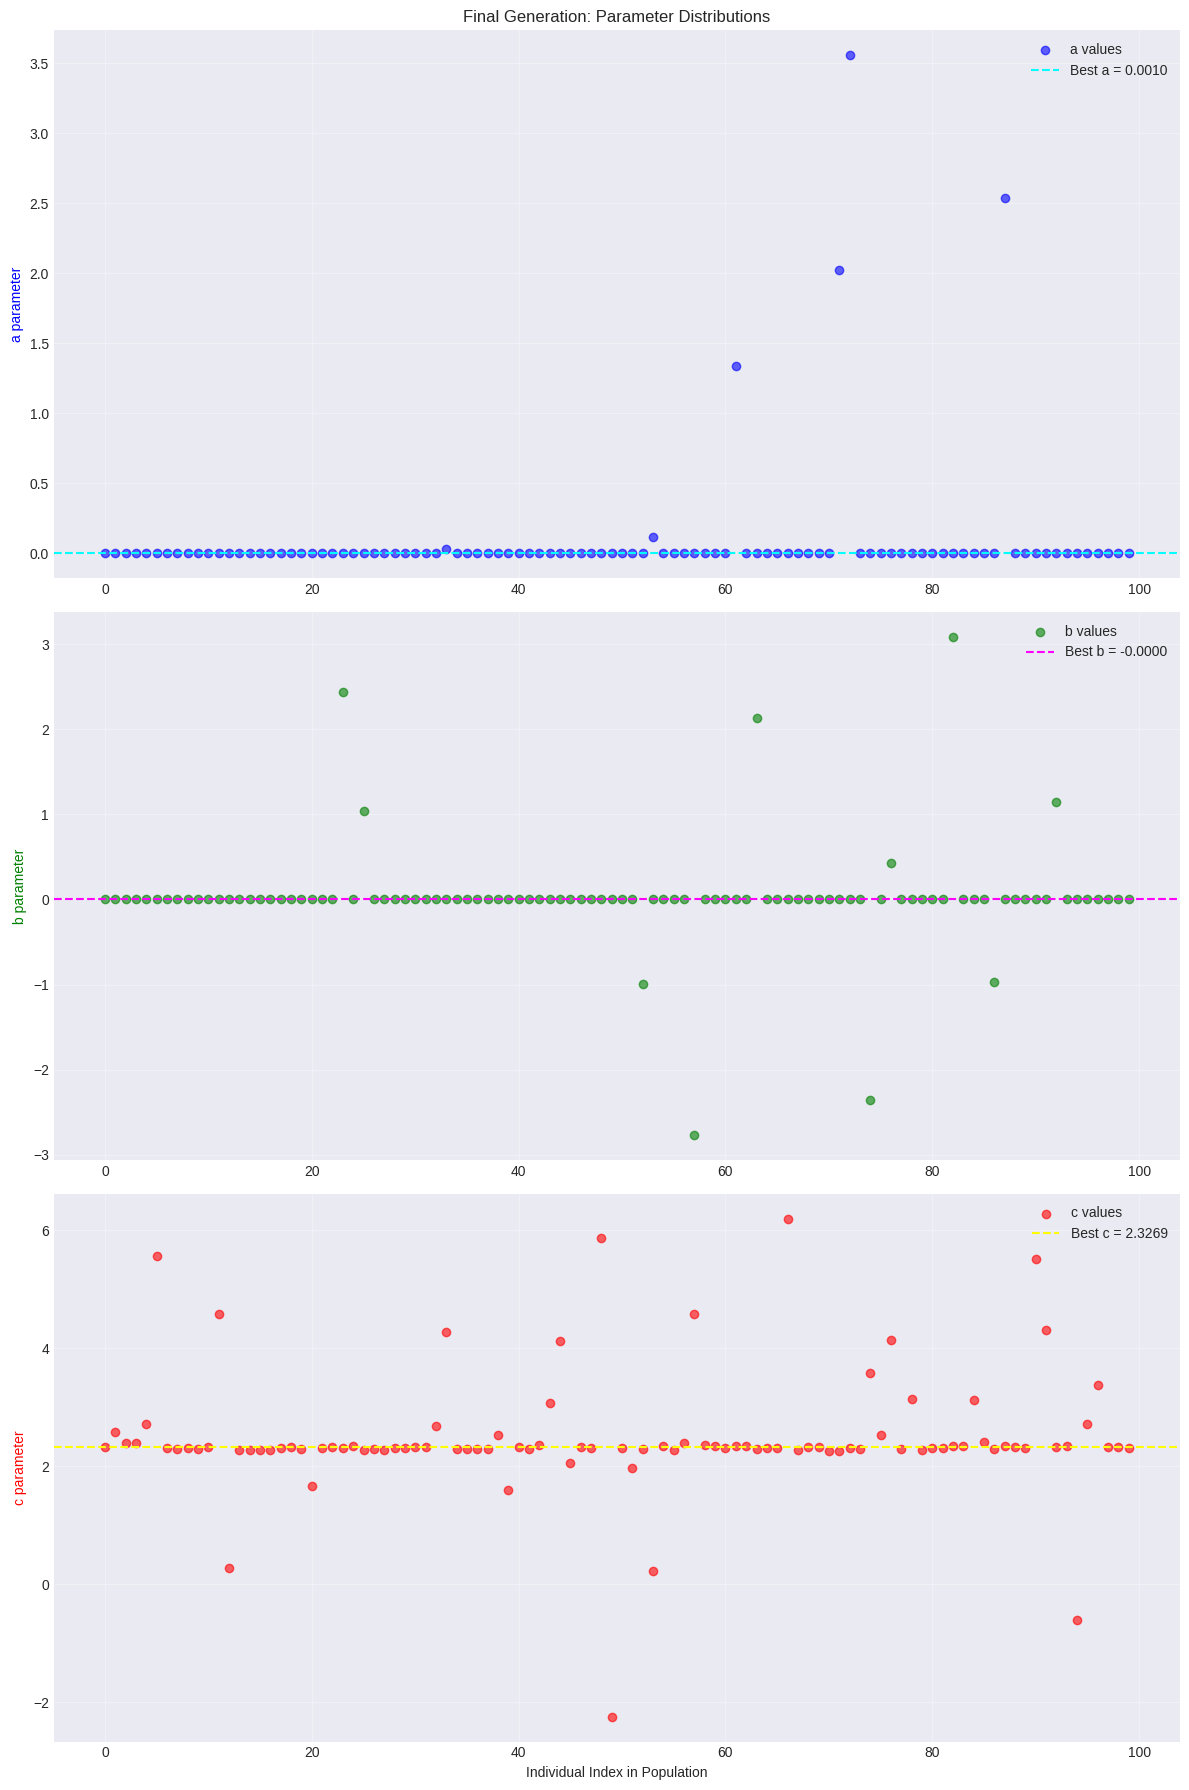

In [86]:
#Final Generation Parameter Distribution
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Get the best individual in final population
final_fitnesses = [fitness_function(ind) for ind in final_population]
best_individual_final = final_population[np.argmax(final_fitnesses)]

# Plot a parameter distribution
axs[0].scatter(range(len(final_population)), [ind[0] for ind in final_population],
               color='blue', alpha=0.6, label='a values')
axs[0].axhline(y=best_individual_final[0], color='cyan', linestyle='--',
               label=f'Best a = {best_individual_final[0]:.4f}')
axs[0].set_ylabel('a parameter', color='blue')
axs[0].set_title('Final Generation: Parameter Distributions')
axs[0].legend()
axs[0].grid(True, alpha=0.3)

# Plot b parameter distribution
axs[1].scatter(range(len(final_population)), [ind[1] for ind in final_population],
               color='green', alpha=0.6, label='b values')
axs[1].axhline(y=best_individual_final[1], color='magenta', linestyle='--',
               label=f'Best b = {best_individual_final[1]:.4f}')
axs[1].set_ylabel('b parameter', color='green')
axs[1].legend()
axs[1].grid(True, alpha=0.3)

# Plot c parameter distribution
axs[2].scatter(range(len(final_population)), [ind[2] for ind in final_population],
               color='red', alpha=0.6, label='c values')
axs[2].axhline(y=best_individual_final[2], color='yellow', linestyle='--',
               label=f'Best c = {best_individual_final[2]:.4f}')
axs[2].set_ylabel('c parameter', color='red')
axs[2].set_xlabel('Individual Index in Population')
axs[2].legend()
axs[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

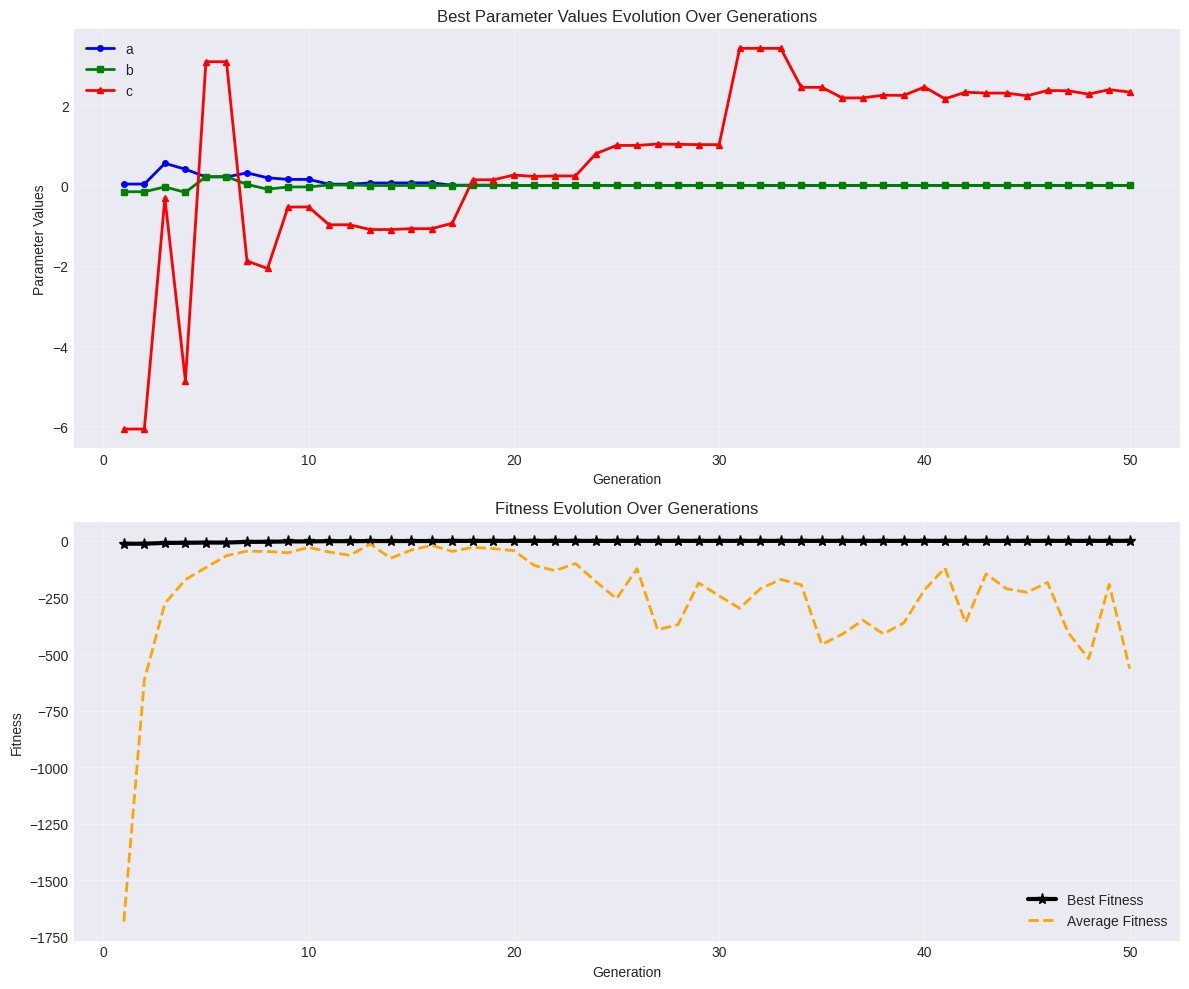

In [87]:
#Parameter Evolution and Fitness Over Generations
generations_list = range(1, len(best_performers) + 1)
a_values = [ind[0][0] for ind in best_performers]
b_values = [ind[0][1] for ind in best_performers]
c_values = [ind[0][2] for ind in best_performers]
best_fitness_values = [fit[1] for fit in best_performers]

fig2, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot parameter evolution
ax1.plot(generations_list, a_values, label='a', color='blue', linewidth=2, marker='o', markersize=4)
ax1.plot(generations_list, b_values, label='b', color='green', linewidth=2, marker='s', markersize=4)
ax1.plot(generations_list, c_values, label='c', color='red', linewidth=2, marker='^', markersize=4)
ax1.set_xlabel('Generation')
ax1.set_ylabel('Parameter Values')
ax1.set_title('Best Parameter Values Evolution Over Generations')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot fitness evolution
ax2.plot(generations_list, best_fitness_values, label='Best Fitness',
         color='black', linewidth=3, marker='*', markersize=8)
ax2.plot(generations_list, avg_fitness_history, label='Average Fitness',
         color='orange', linewidth=2, linestyle='--')
ax2.set_xlabel('Generation')
ax2.set_ylabel('Fitness')
ax2.set_title('Fitness Evolution Over Generations')
ax2.legend()
ax2.grid(True, alpha=0.3)

fig2.tight_layout()
plt.show()

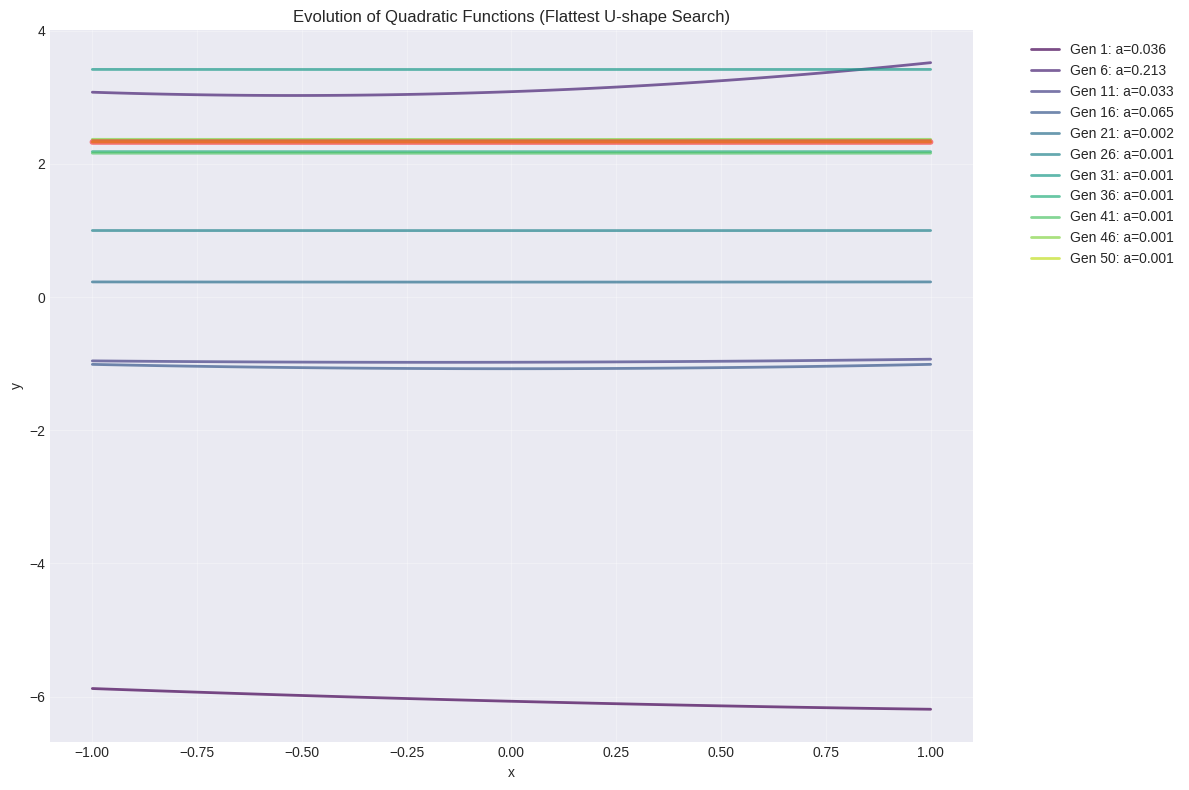

In [88]:
#Evolution of Quadratic Functions
fig3, ax3 = plt.subplots(figsize=(12, 8))

# Plot every 2nd generation for clarity
plot_indices = list(range(0, len(best_performers), max(1, len(best_performers)//10)))
if len(best_performers)-1 not in plot_indices:
    plot_indices.append(len(best_performers)-1)

cmap = cm.viridis
colors = [cmap(i/len(plot_indices)) for i in range(len(plot_indices))]

x_range = np.linspace(-1, 1, 100)
for idx, gen_idx in enumerate(plot_indices):
    best_ind, best_fit = best_performers[gen_idx]
    a, b, c = best_ind
    y_values = a * (x_range ** 2) + b * x_range + c
    ax3.plot(x_range, y_values, color=colors[idx],
            label=f'Gen {gen_idx+1}: a={a:.3f}', alpha=0.7, linewidth=2)

ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Evolution of Quadratic Functions (Flattest U-shape Search)')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True, alpha=0.3)

# Highlight the final best solution
final_a, final_b, final_c = best_solution
final_y = final_a * (x_range ** 2) + final_b * x_range + final_c
ax3.plot(x_range, final_y, color='red', linewidth=4, alpha=0.5,
         label=f'Final Best (Gen {generations})')

fig3.tight_layout()
plt.show()

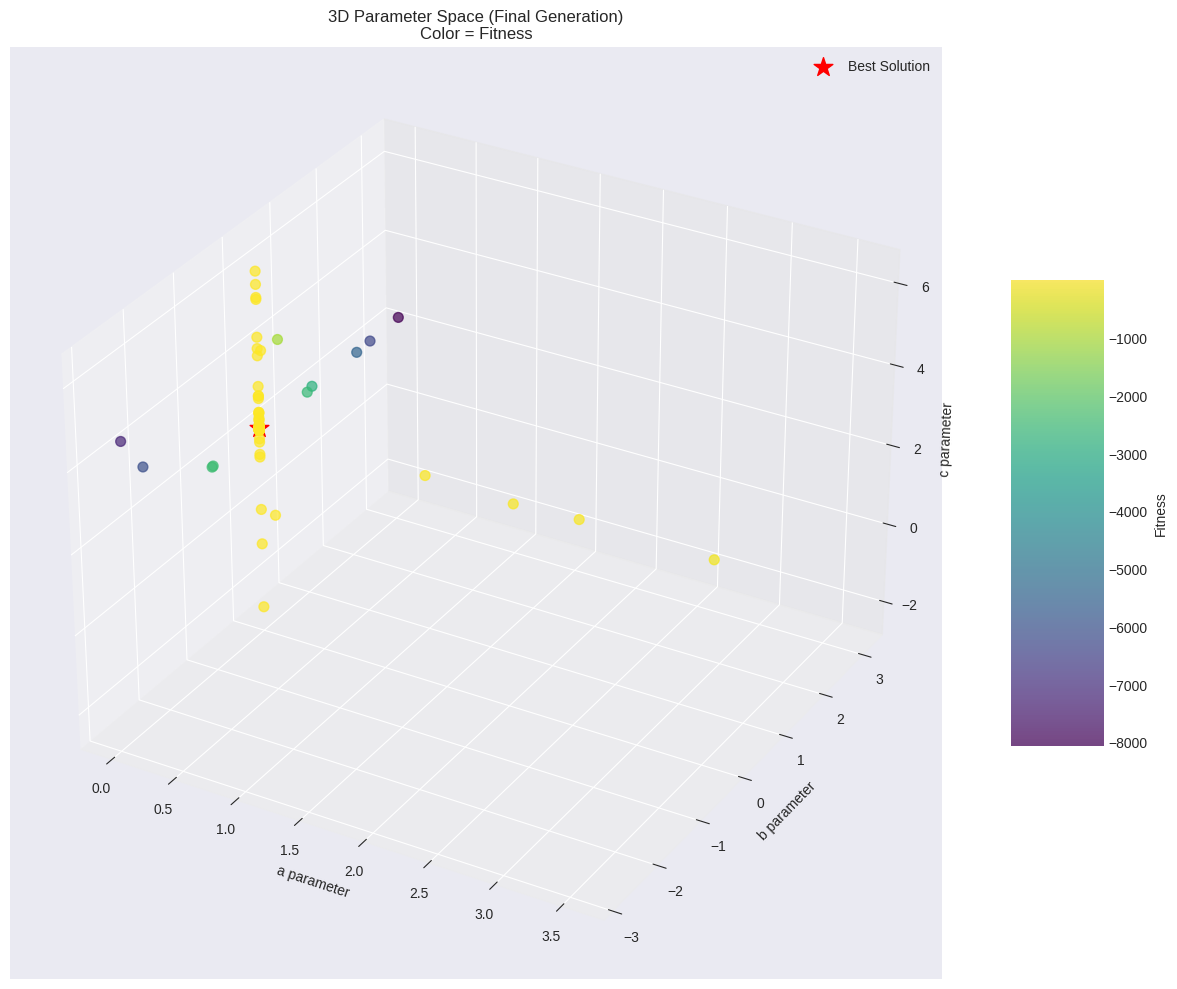

In [89]:
#3D Visualization of Parameter Space
fig4 = plt.figure(figsize=(14, 10))
ax4 = fig4.add_subplot(111, projection='3d')

# Extract parameter values and fitness for final population
a_vals = [ind[0] for ind in final_population]
b_vals = [ind[1] for ind in final_population]
c_vals = [ind[2] for ind in final_population]
fitness_vals = [fitness_function(ind) for ind in final_population]

# Create 3D scatter plot
scatter = ax4.scatter(a_vals, b_vals, c_vals, c=fitness_vals,
                     cmap='viridis', s=50, alpha=0.7)

# Mark the best solution
ax4.scatter([best_solution[0]], [best_solution[1]], [best_solution[2]],
           color='red', s=200, marker='*', label='Best Solution')

ax4.set_xlabel('a parameter')
ax4.set_ylabel('b parameter')
ax4.set_zlabel('c parameter')
ax4.set_title('3D Parameter Space (Final Generation)\nColor = Fitness')
ax4.legend()

# Add colorbar for fitness
plt.colorbar(scatter, ax=ax4, shrink=0.5, aspect=5, label='Fitness')

plt.tight_layout()
plt.show()

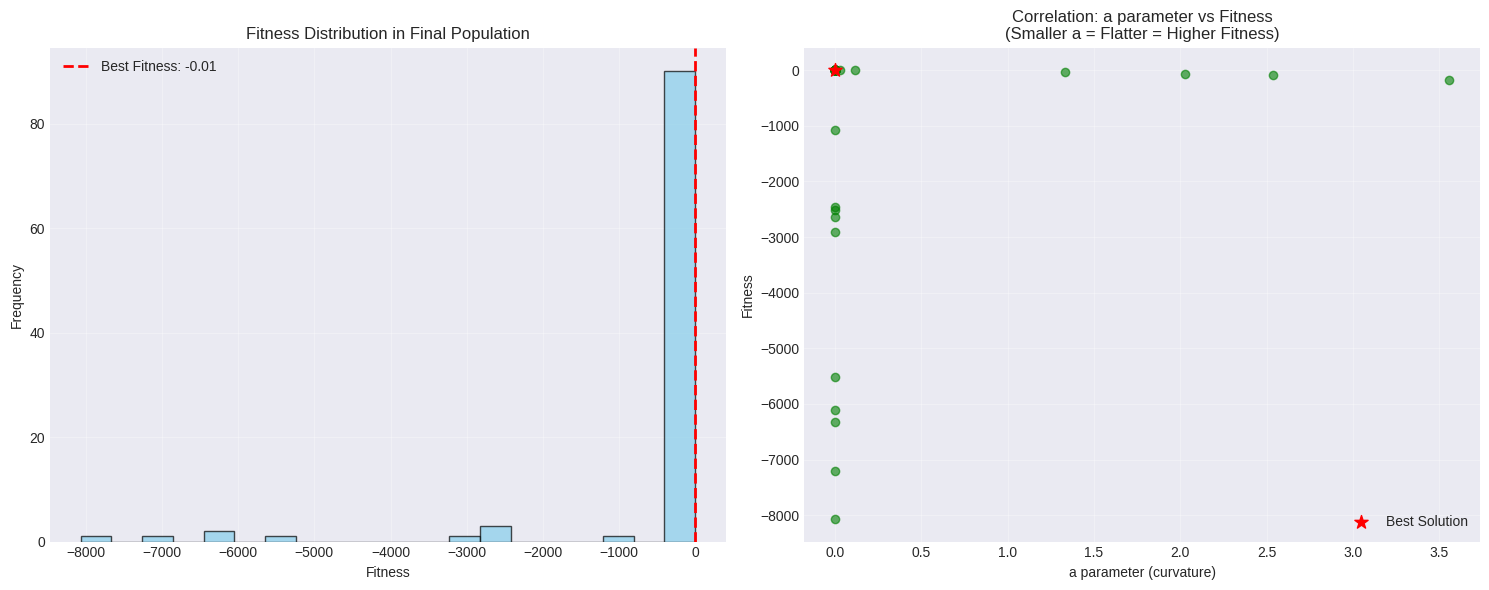

In [90]:
#Additional Analysis: Fitness Distribution
fig5, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Fitness distribution in final population
fitness_values = [fitness_function(ind) for ind in final_population]
ax1.hist(fitness_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
ax1.axvline(x=best_fitness, color='red', linestyle='--', linewidth=2, label=f'Best Fitness: {best_fitness:.2f}')
ax1.set_xlabel('Fitness')
ax1.set_ylabel('Frequency')
ax1.set_title('Fitness Distribution in Final Population')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Correlation between a parameter and fitness
a_values = [ind[0] for ind in final_population]
ax2.scatter(a_values, fitness_values, alpha=0.6, color='green')
ax2.scatter(best_solution[0], best_fitness, color='red', s=100, marker='*', label='Best Solution')
ax2.set_xlabel('a parameter (curvature)')
ax2.set_ylabel('Fitness')
ax2.set_title('Correlation: a parameter vs Fitness\n(Smaller a = Flatter = Higher Fitness)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [91]:
#Final Summary and Comparison
print("="*80)
print("FINAL ANALYSIS AND COMPARISON")
print("="*80)

# Compare initial vs final parameters
initial_population = all_populations[0]
initial_fitnesses = [fitness_function(ind) for ind in initial_population]
initial_best_idx = np.argmax(initial_fitnesses)
initial_best = initial_population[initial_best_idx]
initial_best_fitness = initial_fitnesses[initial_best_idx]

print("\nComparison: Initial Best vs Final Best")
print("-"*40)
print(f"{'Parameter':<10} {'Initial':<15} {'Final':<15} {'Improvement':<15}")
print("-"*40)
print(f"{'a':<10} {initial_best[0]:<15.6f} {best_solution[0]:<15.6f} {best_solution[0]-initial_best[0]:<15.6f}")
print(f"{'b':<10} {initial_best[1]:<15.6f} {best_solution[1]:<15.6f} {best_solution[1]-initial_best[1]:<15.6f}")
print(f"{'c':<10} {initial_best[2]:<15.6f} {best_solution[2]:<15.6f} {best_solution[2]-initial_best[2]:<15.6f}")
print(f"{'Fitness':<10} {initial_best_fitness:<15.6f} {best_fitness:<15.6f} {best_fitness-initial_best_fitness:<15.6f}")

# Calculate flatness metric
def calculate_flatness_metric(params):
    a, b, c = params
    x_points = np.linspace(-1, 1, 100)
    y_values = a * (x_points ** 2) + b * x_points + c
    return np.std(y_values)  # Lower std = flatter

initial_flatness = calculate_flatness_metric(initial_best)
final_flatness = calculate_flatness_metric(best_solution)

print(f"\nFlatness Metric (std of y-values from -1 to 1):")
print(f"  Initial best: {initial_flatness:.6f}")
print(f"  Final best: {final_flatness:.6f}")
print(f"  Improvement: {initial_flatness - final_flatness:.6f} (lower is better)")

print("\n" + "="*80)
print("SEARCH COMPLETE! The algorithm has successfully found a very flat U-shaped quadratic function.")
print("="*80)

FINAL ANALYSIS AND COMPARISON

Comparison: Initial Best vs Final Best
----------------------------------------
Parameter  Initial         Final           Improvement    
----------------------------------------
a          0.035678        0.001000        -0.034678      
b          -0.155556       -0.000000       0.155556       
c          -6.069381       2.326937        8.396318       
Fitness    -12.499836      -0.010011       12.489825      

Flatness Metric (std of y-values from -1 to 1):
  Initial best: 0.091360
  Final best: 0.000304
  Improvement: 0.091056 (lower is better)

SEARCH COMPLETE! The algorithm has successfully found a very flat U-shaped quadratic function.


REDUCED DIMENSION REPORTING
Applying dimensionality reduction techniques to visualize parameter space evolution...

Data collected: 5000 parameter vectors across 50 generations

1. Principal Component Analysis (PCA)


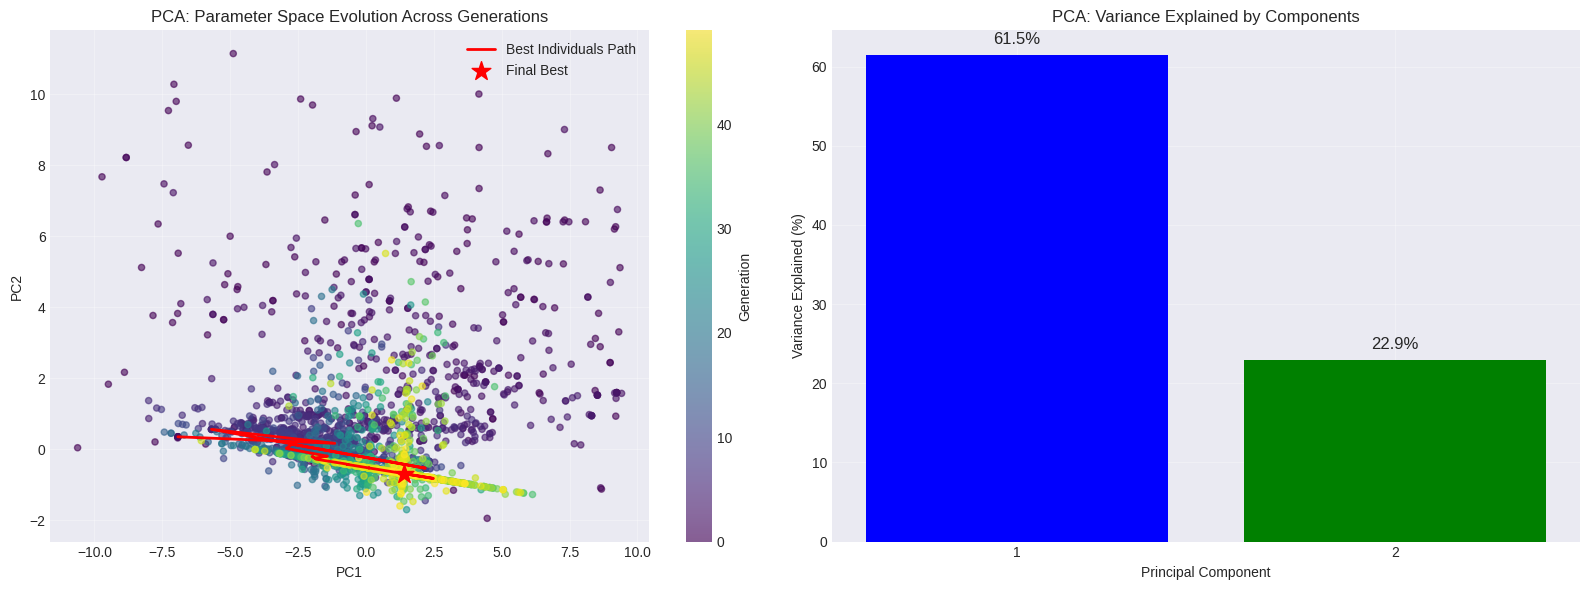

PCA Results:
  PC1 explains 61.50% of variance
  PC2 explains 22.93% of variance
  Total explained variance: 84.43%

2. t-Distributed Stochastic Neighbor Embedding (t-SNE)


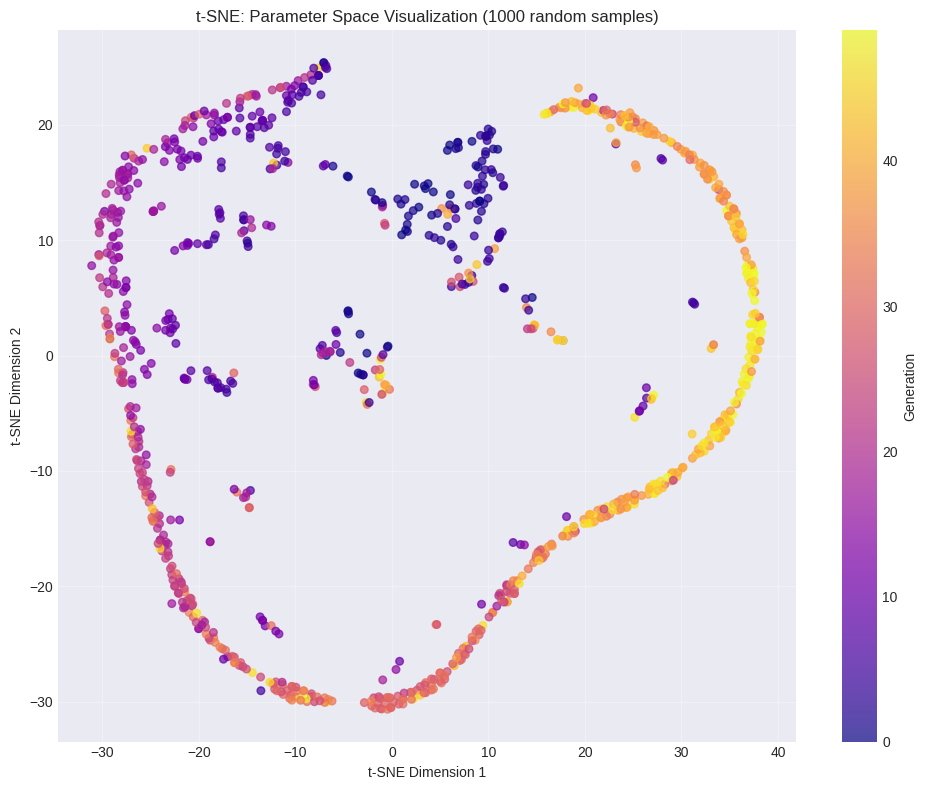

t-SNE completed on 1000 samples

3. Parameter Space Evolution Heatmap


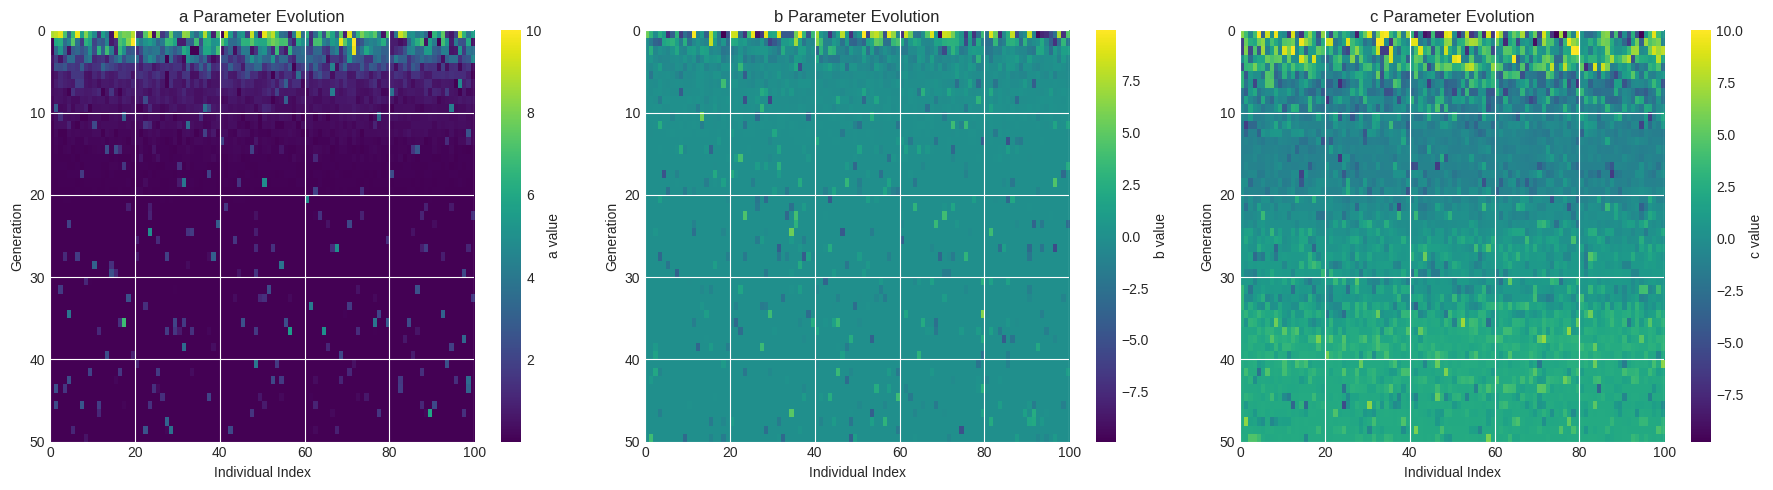


4. Parallel Coordinates Plot of Best Individuals


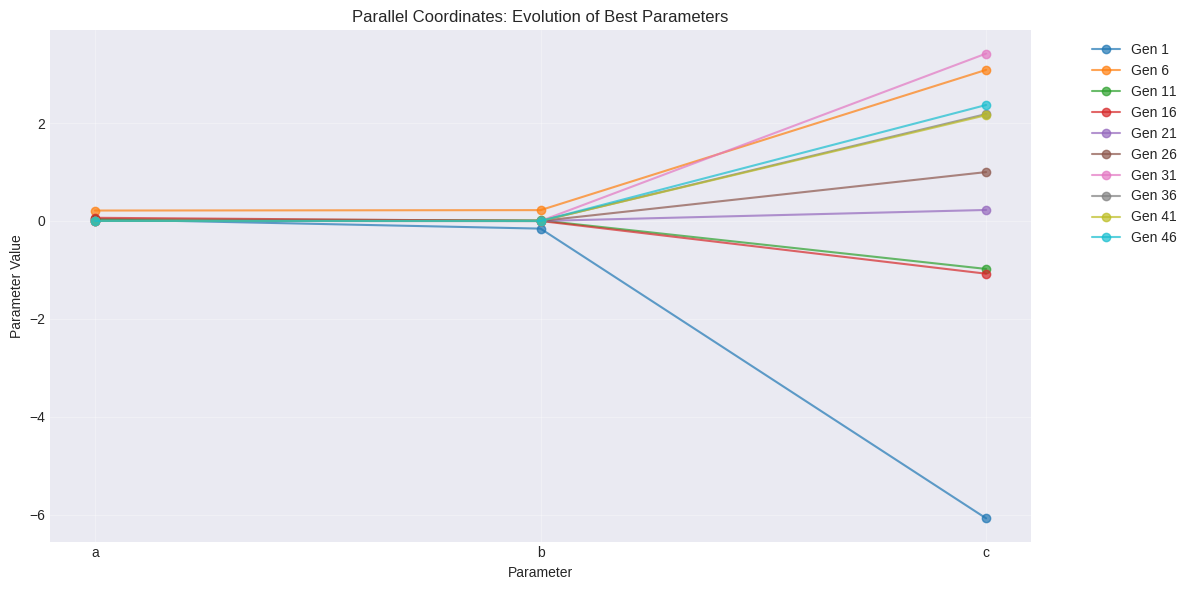


5. 2D Parameter Space with Fitness Contours


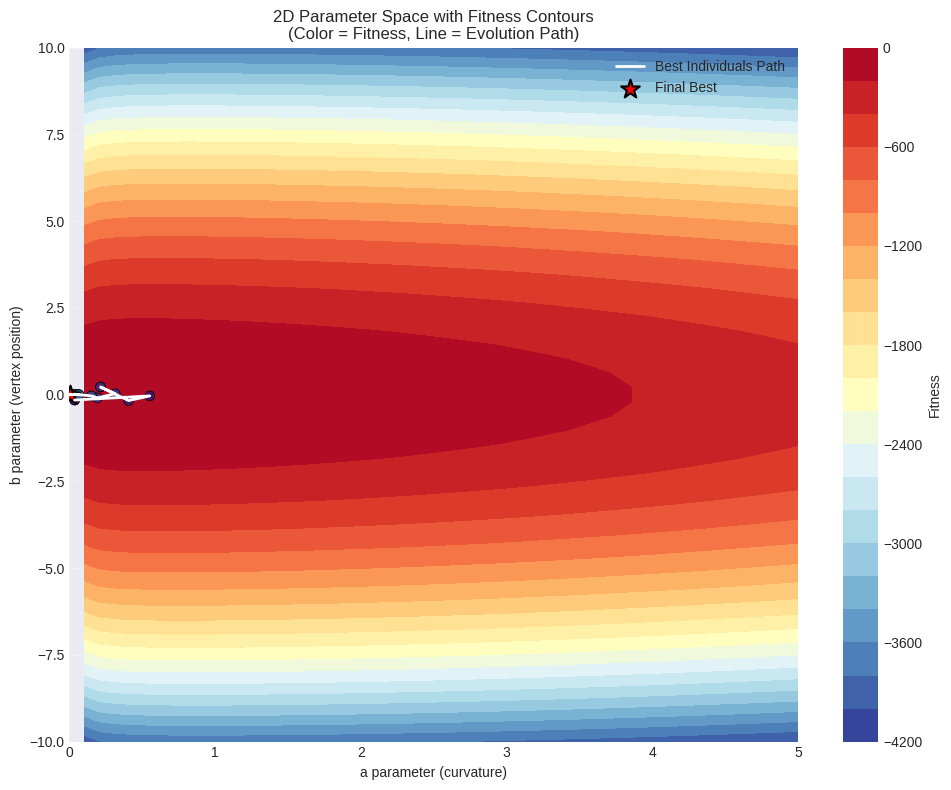


6. Statistical Summary of Parameter Space Evolution


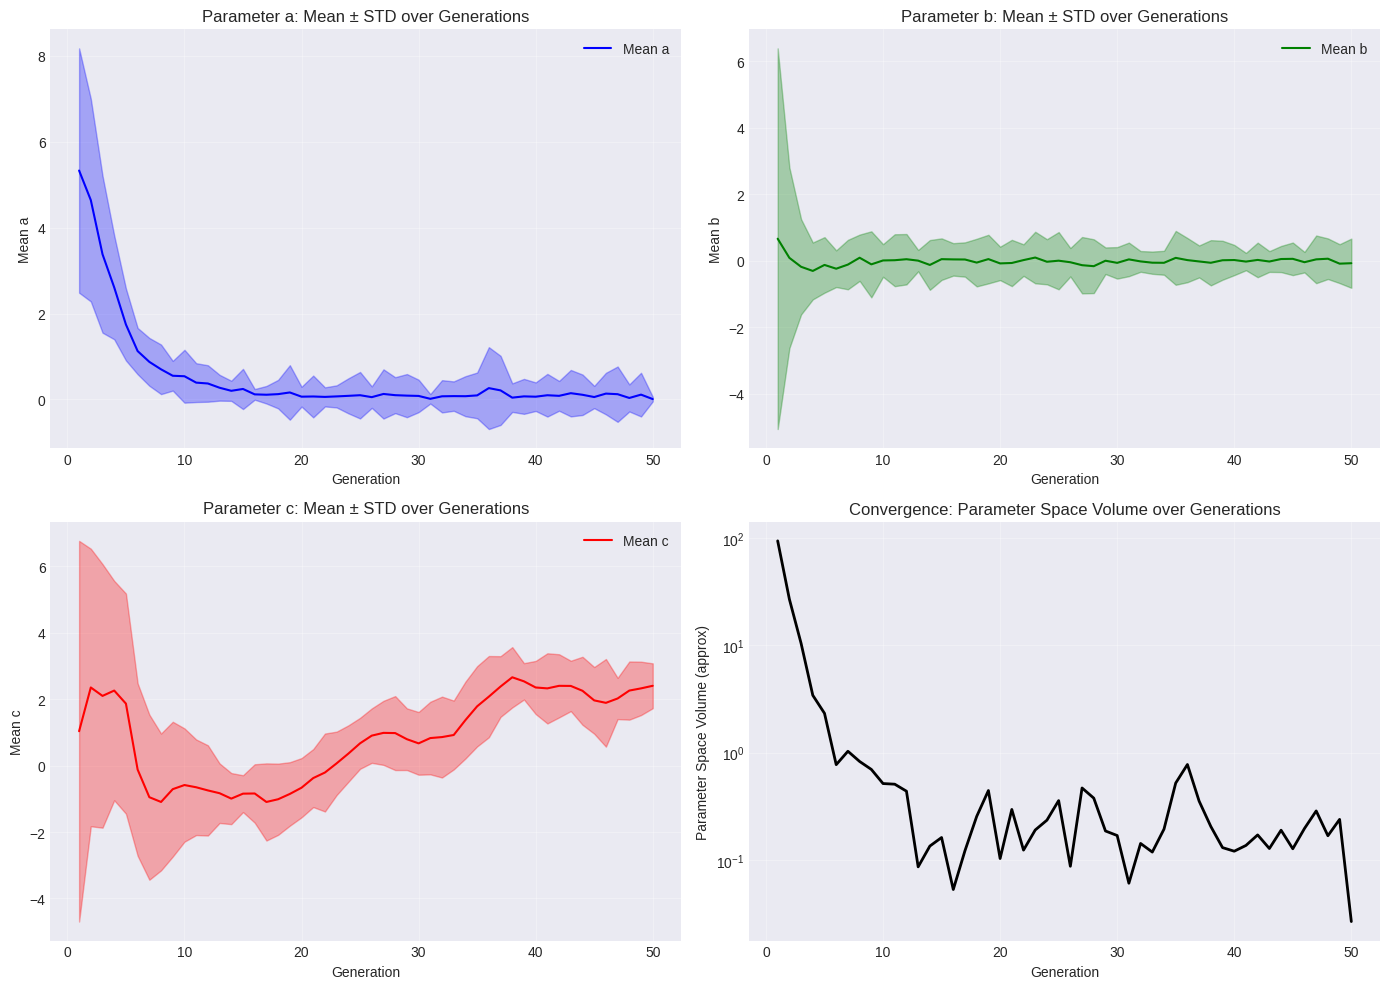


REDUCED DIMENSION REPORTING COMPLETE

Summary of dimensionality reduction techniques applied:
1. PCA (Principal Component Analysis): Linear dimensionality reduction
2. t-SNE: Nonlinear visualization of high-dimensional parameter space
3. Heatmaps: Parameter evolution across generations
4. Parallel Coordinates: Visualizing parameter relationships
5. Fitness Contours: 2D projection with fitness landscape
6. Statistical Analysis: Parameter convergence metrics


In [92]:
# Cell 13: Reduced Dimension Reporting using PCA and t-SNE
print("="*80)
print("REDUCED DIMENSION REPORTING")
print("="*80)
print("Applying dimensionality reduction techniques to visualize parameter space evolution...")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

# Collect all parameter vectors from all generations
all_parameters = []
generation_labels = []
for gen_idx, population in enumerate(all_populations):
    for individual in population:
        all_parameters.append(list(individual))
        generation_labels.append(gen_idx)

all_parameters = np.array(all_parameters)
generation_labels = np.array(generation_labels)

print(f"\nData collected: {len(all_parameters)} parameter vectors across {generations} generations")

# 1. PCA Analysis
print("\n1. Principal Component Analysis (PCA)")
pca = PCA(n_components=2)
parameters_pca = pca.fit_transform(all_parameters)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# PCA scatter plot colored by generation
scatter1 = ax1.scatter(parameters_pca[:, 0], parameters_pca[:, 1],
                      c=generation_labels, cmap='viridis',
                      alpha=0.6, s=20)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('PCA: Parameter Space Evolution Across Generations')
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Generation')

# Plot the path of best individuals through PCA space
best_parameters = np.array([ind[0] for ind in best_performers])
best_pca = pca.transform(best_parameters)
ax1.plot(best_pca[:, 0], best_pca[:, 1], 'r-', linewidth=2, label='Best Individuals Path')
ax1.scatter(best_pca[-1, 0], best_pca[-1, 1], color='red', s=200,
           marker='*', label='Final Best')
ax1.legend()
ax1.grid(True, alpha=0.3)

# PCA variance explained
explained_variance = pca.explained_variance_ratio_
ax2.bar(range(1, 3), explained_variance * 100, color=['blue', 'green'])
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Variance Explained (%)')
ax2.set_title('PCA: Variance Explained by Components')
ax2.set_xticks([1, 2])
ax2.grid(True, alpha=0.3)

# Add text with variance explained
for i, ev in enumerate(explained_variance):
    ax2.text(i + 1, ev * 100 + 1, f'{ev*100:.1f}%',
            ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

print(f"PCA Results:")
print(f"  PC1 explains {explained_variance[0]*100:.2f}% of variance")
print(f"  PC2 explains {explained_variance[1]*100:.2f}% of variance")
print(f"  Total explained variance: {sum(explained_variance)*100:.2f}%")

# 2. t-SNE Analysis
print("\n2. t-Distributed Stochastic Neighbor Embedding (t-SNE)")
# Use a subset for t-SNE to avoid excessive computation
sample_size = min(1000, len(all_parameters))
indices = np.random.choice(len(all_parameters), sample_size, replace=False)
parameters_sample = all_parameters[indices]
labels_sample = generation_labels[indices]

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
parameters_tsne = tsne.fit_transform(parameters_sample)

fig, ax = plt.subplots(figsize=(10, 8))
scatter2 = ax.scatter(parameters_tsne[:, 0], parameters_tsne[:, 1],
                     c=labels_sample, cmap='plasma',
                     alpha=0.7, s=30)
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_title('t-SNE: Parameter Space Visualization (1000 random samples)')
cbar2 = plt.colorbar(scatter2, ax=ax)
cbar2.set_label('Generation')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"t-SNE completed on {sample_size} samples")

# 3. Parameter Space Evolution Heatmap
print("\n3. Parameter Space Evolution Heatmap")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

parameters = ['a', 'b', 'c']
for idx, (param_name, ax) in enumerate(zip(parameters, axes)):
    # Create heatmap of parameter values across generations
    param_values = []
    for population in all_populations:
        param_vals = [ind[idx] for ind in population]
        param_values.append(param_vals)

    param_values = np.array(param_values)

    # Create heatmap
    im = ax.imshow(param_values, aspect='auto', cmap='viridis',
                   extent=[0, population_size, generations, 0])
    ax.set_xlabel('Individual Index')
    ax.set_ylabel('Generation')
    ax.set_title(f'{param_name} Parameter Evolution')
    plt.colorbar(im, ax=ax, label=f'{param_name} value')

plt.tight_layout()
plt.show()

# 4. Parallel Coordinates Plot for Best Individuals
print("\n4. Parallel Coordinates Plot of Best Individuals")
fig, ax = plt.subplots(figsize=(12, 6))

# Select representative best individuals
n_representative = min(10, len(best_performers))
step = max(1, len(best_performers) // n_representative)
selected_best = [best_performers[i][0] for i in range(0, len(best_performers), step)]

# Create parallel coordinates
for i, params in enumerate(selected_best):
    ax.plot(range(3), params, marker='o', label=f'Gen {i*step + 1}', alpha=0.7)

ax.set_xticks(range(3))
ax.set_xticklabels(['a', 'b', 'c'])
ax.set_xlabel('Parameter')
ax.set_ylabel('Parameter Value')
ax.set_title('Parallel Coordinates: Evolution of Best Parameters')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. 2D Projection with Fitness Contours
print("\n5. 2D Parameter Space with Fitness Contours")
# Focus on 'a' and 'b' parameters (most important for U-shape)
fig, ax = plt.subplots(figsize=(10, 8))

# Create grid for contour plot
a_grid = np.linspace(0, upper_bound/2, 50)
b_grid = np.linspace(lower_bound, upper_bound, 50)
A, B = np.meshgrid(a_grid, b_grid)

# Calculate fitness for grid points using average 'c' from best solutions
avg_c = np.mean([ind[0][2] for ind in best_performers])
fitness_grid = np.zeros_like(A)

for i in range(len(a_grid)):
    for j in range(len(b_grid)):
        fitness_grid[j, i] = fitness_function([A[j, i], B[j, i], avg_c])

# Plot contour
contour = ax.contourf(A, B, fitness_grid, levels=20, cmap='RdYlBu_r')
plt.colorbar(contour, ax=ax, label='Fitness')

# Plot path of best individuals
best_a = [ind[0][0] for ind in best_performers]
best_b = [ind[0][1] for ind in best_performers]
ax.plot(best_a, best_b, 'w-', linewidth=2, label='Best Individuals Path')
ax.scatter(best_a, best_b, c=range(len(best_performers)),
          cmap='viridis', s=50, edgecolors='black', linewidth=0.5)
ax.scatter(best_a[-1], best_b[-1], color='red', s=200,
          marker='*', label='Final Best', edgecolors='black', linewidth=1.5)

ax.set_xlabel('a parameter (curvature)')
ax.set_ylabel('b parameter (vertex position)')
ax.set_title('2D Parameter Space with Fitness Contours\n(Color = Fitness, Line = Evolution Path)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. Statistical Summary of Parameter Evolution
print("\n6. Statistical Summary of Parameter Space Evolution")
# Calculate statistics for each generation
param_stats = []
for gen_idx, population in enumerate(all_populations):
    params_array = np.array(population)
    stats = {
        'generation': gen_idx + 1,
        'mean_a': np.mean(params_array[:, 0]),
        'std_a': np.std(params_array[:, 0]),
        'mean_b': np.mean(params_array[:, 1]),
        'std_b': np.std(params_array[:, 1]),
        'mean_c': np.mean(params_array[:, 2]),
        'std_c': np.std(params_array[:, 2]),
        'param_space_volume': np.prod(np.std(params_array, axis=0))  # Approximate volume
    }
    param_stats.append(stats)

# Convert to DataFrame for easier analysis
df_stats = pd.DataFrame(param_stats)

# Plot parameter convergence
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Mean parameters over generations
axes[0, 0].plot(df_stats['generation'], df_stats['mean_a'], 'b-', label='Mean a')
axes[0, 0].fill_between(df_stats['generation'],
                       df_stats['mean_a'] - df_stats['std_a'],
                       df_stats['mean_a'] + df_stats['std_a'],
                       alpha=0.3, color='blue')
axes[0, 0].set_xlabel('Generation')
axes[0, 0].set_ylabel('Mean a')
axes[0, 0].set_title('Parameter a: Mean ± STD over Generations')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(df_stats['generation'], df_stats['mean_b'], 'g-', label='Mean b')
axes[0, 1].fill_between(df_stats['generation'],
                       df_stats['mean_b'] - df_stats['std_b'],
                       df_stats['mean_b'] + df_stats['std_b'],
                       alpha=0.3, color='green')
axes[0, 1].set_xlabel('Generation')
axes[0, 1].set_ylabel('Mean b')
axes[0, 1].set_title('Parameter b: Mean ± STD over Generations')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(df_stats['generation'], df_stats['mean_c'], 'r-', label='Mean c')
axes[1, 0].fill_between(df_stats['generation'],
                       df_stats['mean_c'] - df_stats['std_c'],
                       df_stats['mean_c'] + df_stats['std_c'],
                       alpha=0.3, color='red')
axes[1, 0].set_xlabel('Generation')
axes[1, 0].set_ylabel('Mean c')
axes[1, 0].set_title('Parameter c: Mean ± STD over Generations')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Parameter space volume contraction
axes[1, 1].plot(df_stats['generation'], df_stats['param_space_volume'], 'k-', linewidth=2)
axes[1, 1].set_xlabel('Generation')
axes[1, 1].set_ylabel('Parameter Space Volume (approx)')
axes[1, 1].set_title('Convergence: Parameter Space Volume over Generations')
axes[1, 1].set_yscale('log')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("REDUCED DIMENSION REPORTING COMPLETE")
print("="*80)
print("\nSummary of dimensionality reduction techniques applied:")
print("1. PCA (Principal Component Analysis): Linear dimensionality reduction")
print("2. t-SNE: Nonlinear visualization of high-dimensional parameter space")
print("3. Heatmaps: Parameter evolution across generations")
print("4. Parallel Coordinates: Visualizing parameter relationships")
print("5. Fitness Contours: 2D projection with fitness landscape")
print("6. Statistical Analysis: Parameter convergence metrics")
print("="*80)

# **Artificial Neural Network**

In [57]:
#Import libraries and set seed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Set random seed for reproducibility
np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')

In [58]:
def initialize_parameters(input_size, hidden_size, output_size, initialization="he"):
    """
    Initialize parameters with different initialization methods
    """
    parameters = {}

    if initialization == "random":
        parameters["W1"] = np.random.randn(hidden_size, input_size) * 0.01
        parameters["W2"] = np.random.randn(output_size, hidden_size) * 0.01
    elif initialization == "xavier":
        parameters["W1"] = np.random.randn(hidden_size, input_size) * np.sqrt(1. / input_size)
        parameters["W2"] = np.random.randn(output_size, hidden_size) * np.sqrt(1. / hidden_size)
    elif initialization == "he":
        parameters["W1"] = np.random.randn(hidden_size, input_size) * np.sqrt(2. / input_size)
        parameters["W2"] = np.random.randn(output_size, hidden_size) * np.sqrt(2. / hidden_size)
    else:
        raise ValueError("Initialization method not supported. Use 'random', 'xavier', or 'he'")

    parameters["b1"] = np.zeros((hidden_size, 1))
    parameters["b2"] = np.zeros((output_size, 1))

    return parameters

def sigmoid(Z):
    """Sigmoid activation function with numerical stability"""
    Z = np.clip(Z, -500, 500)
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(A):
    """Derivative of sigmoid"""
    return A * (1 - A)

def relu(Z):
    """ReLU activation function"""
    return np.maximum(0, Z)

def relu_derivative(Z):
    """Derivative of ReLU"""
    return (Z > 0).astype(float)

def forward_propagation(X, parameters, activation="relu"):
    """
    Forward propagation through the network
    """
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]

    Z1 = np.dot(W1, X) + b1

    if activation == "relu":
        A1 = relu(Z1)
    elif activation == "sigmoid":
        A1 = sigmoid(Z1)
    else:
        raise ValueError("Activation function not supported. Use 'relu' or 'sigmoid'")

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)  # Output layer uses sigmoid for binary classification

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

def compute_cost(Y, A2, parameters=None, lambd=0, class_weights=None):
    """
    Compute binary cross-entropy cost with optional L2 regularization and class weighting
    """
    m = Y.shape[1]

    epsilon = 1e-8
    cost_terms = -Y * np.log(A2 + epsilon) - (1 - Y) * np.log(1 - A2 + epsilon)

    if class_weights is not None:
        weight_matrix = Y * class_weights[1] + (1 - Y) * class_weights[0]
        cost_terms = cost_terms * weight_matrix

    cost = np.sum(cost_terms) / m

    if lambd > 0 and parameters is not None:
        W1 = parameters["W1"]
        W2 = parameters["W2"]
        L2_cost = (lambd/(2*m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
        cost += L2_cost

    return np.squeeze(cost)

In [59]:
def backward_propagation(X, Y, parameters, cache, activation="relu", lambd=0, class_weights=None):
    """
    Backward propagation with optional regularization and class weighting
    """
    m = X.shape[1]
    W1, W2 = parameters["W1"], parameters["W2"]
    A1, A2, Z1 = cache["A1"], cache["A2"], cache["Z1"]

    dZ2 = A2 - Y

    if class_weights is not None:
        weight_matrix = Y * class_weights[1] + (1 - Y) * class_weights[0]
        dZ2 = dZ2 * weight_matrix

    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    if lambd > 0:
        dW2 += (lambd/m) * W2

    if activation == "relu":
        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * relu_derivative(Z1)
    elif activation == "sigmoid":
        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * sigmoid_derivative(A1)
    else:
        raise ValueError("Activation function not supported")

    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    if lambd > 0:
        dW1 += (lambd/m) * W1

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    """
    L = len(parameters) // 2
    updated_params = {}

    for l in range(1, L + 1):
        updated_params[f"W{l}"] = parameters[f"W{l}"] - learning_rate * grads[f"dW{l}"]
        updated_params[f"b{l}"] = parameters[f"b{l}"] - learning_rate * grads[f"db{l}"]

    return updated_params

In [60]:
def train_neural_network(X_train, Y_train, X_val, Y_val, input_size, hidden_size, output_size,
                         epochs=1000, learning_rate=0.01,
                         activation="relu", initialization="he",
                         lambd=0, class_weights=None, print_cost=True):
    """
    Train the neural network for credit card fraud detection
    """
    parameters = initialize_parameters(input_size, hidden_size, output_size, initialization)
    train_costs = []
    val_costs = []
    train_accuracies = []
    val_accuracies = []

    best_val_accuracy = 0
    best_parameters = None
    patience = 20
    patience_counter = 0

    print(f"Starting training for {epochs} epochs...")

    for i in range(epochs):
        A2_train, cache = forward_propagation(X_train, parameters, activation)

        train_cost = compute_cost(Y_train, A2_train, parameters, lambd, class_weights)
        train_costs.append(train_cost)

        train_predictions = (A2_train > 0.5).astype(int)
        train_accuracy = np.mean(train_predictions == Y_train) * 100
        train_accuracies.append(train_accuracy)

        A2_val, _ = forward_propagation(X_val, parameters, activation)
        val_cost = compute_cost(Y_val, A2_val, parameters, lambd, class_weights)
        val_costs.append(val_cost)

        val_predictions = (A2_val > 0.5).astype(int)
        val_accuracy = np.mean(val_predictions == Y_val) * 100
        val_accuracies.append(val_accuracy)

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_parameters = {k: v.copy() for k, v in parameters.items()}
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            if print_cost:
                print(f"Early stopping at epoch {i}")
            break

        grads = backward_propagation(X_train, Y_train, parameters, cache, activation, lambd, class_weights)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % (epochs//10) == 0 and i > 0:
            print(f"Epoch {i}: Train Cost = {train_cost:.6f}, Val Cost = {val_cost:.6f}")
            print(f"         Train Acc = {train_accuracy:.2f}%, Val Acc = {val_accuracy:.2f}%")

    if best_parameters is not None:
        parameters = best_parameters

    print(f"\nTraining completed after {i+1} epochs")
    print(f"Best validation accuracy: {best_val_accuracy:.2f}%")

    return parameters, train_costs, val_costs, train_accuracies, val_accuracies

In [61]:
def plot_training_history(train_costs, val_costs, train_accuracies, val_accuracies):
    """Plot training history"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

    ax1.plot(train_costs, label='Training Cost', linewidth=2)
    ax1.plot(val_costs, label='Validation Cost', linewidth=2)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Cost')
    ax1.set_title('Training and Validation Cost')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    ax2.plot(train_accuracies, label='Training Accuracy', linewidth=2)
    ax2.plot(val_accuracies, label='Validation Accuracy', linewidth=2)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    cost_diff = np.array(val_costs) - np.array(train_costs)
    ax3.plot(cost_diff, color='purple', linewidth=2)
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Cost Difference (Val - Train)')
    ax3.set_title('Generalization Gap')
    ax3.grid(True, alpha=0.3)
    ax3.axhline(y=0, color='r', linestyle='--', alpha=0.5)

    final_metrics = {
        'Final Train Cost': train_costs[-1],
        'Final Val Cost': val_costs[-1],
        'Final Train Acc': train_accuracies[-1],
        'Final Val Acc': val_accuracies[-1]
    }

    colors = ['blue', 'orange', 'green', 'red']
    ax4.bar(range(len(final_metrics)), list(final_metrics.values()), color=colors)
    ax4.set_xticks(range(len(final_metrics)))
    ax4.set_xticklabels(list(final_metrics.keys()), rotation=45, ha='right')
    ax4.set_title('Final Epoch Metrics')

    plt.tight_layout()
    plt.show()

def predict(X, parameters, activation="relu"):
    """Make predictions"""
    A2, _ = forward_propagation(X, parameters, activation)
    predictions = (A2 > 0.5).astype(int)
    probabilities = A2
    return predictions, probabilities

In [62]:
def evaluate_model(y_true, y_pred, y_prob, dataset_name="Test"):
    """Evaluate model performance comprehensively"""
    accuracy = accuracy_score(y_true.flatten(), y_pred.flatten()) * 100
    print(f"\n{dataset_name} Set Evaluation:")
    print(f"Accuracy: {accuracy:.2f}%")

    cm = confusion_matrix(y_true.flatten(), y_pred.flatten())
    print("\nConfusion Matrix:")
    print(cm)

    print("\nClassification Report:")
    print(classification_report(y_true.flatten(), y_pred.flatten(), target_names=['Legitimate', 'Fraud']))

    tn, fp, fn, tp = cm.ravel()

    print(f"\nDetailed Metrics:")
    print(f"True Positives: {tp}")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"Precision: {tp/(tp+fp):.3f}" if (tp+fp) > 0 else "Precision: N/A")
    print(f"Recall (Sensitivity): {tp/(tp+fn):.3f}" if (tp+fn) > 0 else "Recall: N/A")
    print(f"Specificity: {tn/(tn+fp):.3f}" if (tn+fp) > 0 else "Specificity: N/A")
    print(f"F1-Score: {2*tp/(2*tp+fp+fn):.3f}" if (2*tp+fp+fn) > 0 else "F1-Score: N/A")

    if len(np.unique(y_true)) > 1:
        auc_roc = roc_auc_score(y_true.flatten(), y_prob.flatten())
        print(f"AUC-ROC Score: {auc_roc:.3f}")

    return accuracy, cm

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    """Plot confusion matrix"""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Legit', 'Predicted Fraud'],
                yticklabels=['Actual Legit', 'Actual Fraud'])
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_true, y_prob, title='ROC Curve'):
    """Plot ROC curve"""
    fpr, tpr, thresholds = roc_curve(y_true.flatten(), y_prob.flatten())
    auc_score = roc_auc_score(y_true.flatten(), y_prob.flatten())

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, 'b-', linewidth=2, label=f'AUC = {auc_score:.3f}')
    plt.plot([0, 1], [0, 1], 'r--', linewidth=1, label='Random Classifier')
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [63]:
def prepare_credit_card_data(df_imputed, test_size=0.2, val_size=0.2):
    """Prepare credit card data for neural network with stratified sampling"""
    print("Preparing credit card data for neural network...")

    # Separate features and target
    X = df_imputed.drop(['Class', 'Time'], axis=1).values.T  # Drop Time column
    Y = df_imputed['Class'].values.reshape(1, -1)

    print(f"Original data shape: X={X.shape}, Y={Y.shape}")
    print(f"Fraud cases: {np.sum(Y)}, Total samples: {Y.shape[1]}")
    print(f"Fraud percentage: {np.mean(Y) * 100:.4f}%")

    # First, split into train+val and test
    X_temp = X.T  # Transpose for sklearn
    Y_temp = Y.T

    # For initial split, use stratify
    X_train_val, X_test, Y_train_val, Y_test = train_test_split(
        X_temp, Y_temp,
        test_size=test_size,
        random_state=42,
        stratify=Y_temp
    )

    # Now split train+val into train and validation
    # Calculate the proportion for validation from the remaining data
    val_prop = val_size / (1 - test_size)

    # For this split, we might not be able to stratify due to very few fraud samples
    # Let's check if we have enough fraud samples
    fraud_count_val = np.sum(Y_train_val)
    if fraud_count_val >= 4:  # Need at least 2 in each split
        X_train, X_val, Y_train, Y_val = train_test_split(
            X_train_val, Y_train_val,
            test_size=val_prop,
            random_state=42,
            stratify=Y_train_val
        )
    else:
        print("Warning: Not enough fraud samples for stratified validation split. Using random split.")
        X_train, X_val, Y_train, Y_val = train_test_split(
            X_train_val, Y_train_val,
            test_size=val_prop,
            random_state=42,
            stratify=None
        )

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train).T
    X_val_scaled = scaler.transform(X_val).T
    X_test_scaled = scaler.transform(X_test).T

    # Transpose Y to match neural network format (1 x m)
    Y_train = Y_train.T
    Y_val = Y_val.T
    Y_test = Y_test.T

    print(f"\n✓ Final dataset sizes:")
    print(f"  Training set: X={X_train_scaled.shape}, Y={Y_train.shape}")
    print(f"  Validation set: X={X_val_scaled.shape}, Y={Y_val.shape}")
    print(f"  Test set: X={X_test_scaled.shape}, Y={Y_test.shape}")

    print(f"\nClass distribution:")
    train_fraud_pct = np.mean(Y_train) * 100
    val_fraud_pct = np.mean(Y_val) * 100
    test_fraud_pct = np.mean(Y_test) * 100

    print(f"  Training: {train_fraud_pct:.4f}% fraud ({int(np.sum(Y_train))} fraud samples)")
    print(f"  Validation: {val_fraud_pct:.4f}% fraud ({int(np.sum(Y_val))} fraud samples)")
    print(f"  Test: {test_fraud_pct:.4f}% fraud ({int(np.sum(Y_test))} fraud samples)")

    # Check if we have at least some fraud samples in each set
    if np.sum(Y_train) == 0 or np.sum(Y_val) == 0 or np.sum(Y_test) == 0:
        print("\n⚠️  WARNING: One or more sets have ZERO fraud samples!")
        print("Consider using different sampling techniques like SMOTE or adjusting split ratios.")

    return X_train_scaled, Y_train, X_val_scaled, Y_val, X_test_scaled, Y_test, scaler

In [64]:
def prepare_credit_card_data_oversampled(df_imputed, test_size=0.2, val_size=0.2):
    """Prepare credit card data with oversampling of minority class"""
    print("Preparing credit card data with oversampling...")

    from imblearn.over_sampling import RandomOverSampler
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.pipeline import Pipeline

    # Separate features and target
    X = df_imputed.drop(['Class', 'Time'], axis=1).values  # Keep as (n_samples, n_features)
    y = df_imputed['Class'].values

    print(f"Original data shape: X={X.shape}, y={y.shape}")
    print(f"Fraud cases: {np.sum(y)}, Total samples: {y.shape[0]}")
    print(f"Fraud percentage: {np.mean(y) * 100:.4f}%")

    # First split into train+val and test (stratified to preserve class distribution in test)
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y
    )

    # Now split train+val into train and validation
    val_prop = val_size / (1 - test_size)

    # For this split, let's use random (not stratified) to ensure we get some fraud in validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val,
        test_size=val_prop,
        random_state=42,
        stratify=None
    )

    print(f"\nBefore oversampling:")
    print(f"  Training: {np.mean(y_train) * 100:.4f}% fraud ({int(np.sum(y_train))} fraud samples)")
    print(f"  Validation: {np.mean(y_val) * 100:.4f}% fraud ({int(np.sum(y_val))} fraud samples)")

    # Apply oversampling to training set ONLY (not validation or test)
    # We'll oversample fraud to be 10% of the training data
    fraud_ratio = 0.1  # Target 10% fraud in training set

    # Calculate how many fraud samples we need
    n_legit = np.sum(y_train == 0)
    n_fraud_needed = int(n_legit * fraud_ratio / (1 - fraud_ratio))
    n_fraud_current = np.sum(y_train == 1)

    if n_fraud_current < n_fraud_needed:
        # Oversample fraud
        ros = RandomOverSampler(
            sampling_strategy={1: n_fraud_needed},
            random_state=42
        )
        X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
    else:
        # Undersample legit if we have too many fraud (unlikely but possible)
        n_legit_needed = int(n_fraud_current * (1 - fraud_ratio) / fraud_ratio)
        if n_legit > n_legit_needed:
            rus = RandomUnderSampler(
                sampling_strategy={0: n_legit_needed},
                random_state=42
            )
            X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
        else:
            X_train_res, y_train_res = X_train, y_train

    # Standardize features using training data only
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_res)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Transpose for neural network format (n_features x n_samples)
    X_train_scaled = X_train_scaled.T
    X_val_scaled = X_val_scaled.T
    X_test_scaled = X_test_scaled.T

    # Reshape Y for neural network (1 x n_samples)
    Y_train = y_train_res.reshape(1, -1)
    Y_val = y_val.reshape(1, -1)
    Y_test = y_test.reshape(1, -1)

    print(f"\n✓ After oversampling:")
    print(f"  Training set: X={X_train_scaled.shape}, Y={Y_train.shape}")
    print(f"    -> Fraud: {np.mean(Y_train) * 100:.2f}% ({int(np.sum(Y_train))} samples)")
    print(f"  Validation set: X={X_val_scaled.shape}, Y={Y_val.shape}")
    print(f"    -> Fraud: {np.mean(Y_val) * 100:.4f}% ({int(np.sum(Y_val))} samples)")
    print(f"  Test set: X={X_test_scaled.shape}, Y={Y_test.shape}")
    print(f"    -> Fraud: {np.mean(Y_test) * 100:.4f}% ({int(np.sum(Y_test))} samples)")

    return X_train_scaled, Y_train, X_val_scaled, Y_val, X_test_scaled, Y_test, scaler

In [67]:
print("="*80)
print("TRAINING NEURAL NETWORK FOR CREDIT CARD FRAUD DETECTION")
print("="*80)

# Get the input size from our prepared data
input_size = X_train.shape[0]
hidden_size = 64  # You can adjust this
output_size = 1

print(f"Neural Network Architecture:")
print(f"Input layer: {input_size} neurons")
print(f"Hidden layer: {hidden_size} neurons")
print(f"Output layer: {output_size} neuron")
print(f"Training samples: {X_train.shape[1]}")
print(f"Validation samples: {X_val.shape[1]}")

print("\nTraining configuration:")
print(f"Epochs: 500")
print(f"Learning rate: 0.001")
print(f"Activation: ReLU (hidden), Sigmoid (output)")
print(f"Regularization: L2 with λ=0.001")
print(f"Class weights: {'Enabled' if class_weights is not None else 'Disabled'}")

# Train the network
print("\n" + "="*80)
print("STARTING TRAINING...")
print("="*80)

trained_parameters, train_costs, val_costs, train_accuracies, val_accuracies = train_neural_network(
    X_train, Y_train, X_val, Y_val,
    input_size=input_size,
    hidden_size=hidden_size,
    output_size=output_size,
    epochs=500,
    learning_rate=0.001,
    activation="relu",
    initialization="he",
    lambd=0.001,
    class_weights=class_weights,
    print_cost=True
)

print("\n" + "="*80)
print("TRAINING COMPLETED!")
print("="*80)

print(f"\nFinal training accuracy: {train_accuracies[-1]:.2f}%")
print(f"Final validation accuracy: {val_accuracies[-1]:.2f}%")
print(f"Final training cost: {train_costs[-1]:.6f}")
print(f"Final validation cost: {val_costs[-1]:.6f}")

TRAINING NEURAL NETWORK FOR CREDIT CARD FRAUD DETECTION
Neural Network Architecture:
Input layer: 29 neurons
Hidden layer: 64 neurons
Output layer: 1 neuron
Training samples: 15
Validation samples: 13

Training configuration:
Epochs: 500
Learning rate: 0.001
Activation: ReLU (hidden), Sigmoid (output)
Regularization: L2 with λ=0.001
Class weights: Enabled

STARTING TRAINING...
Starting training for 500 epochs...
Early stopping at epoch 20

Training completed after 21 epochs
Best validation accuracy: 30.77%

TRAINING COMPLETED!

Final training accuracy: 26.67%
Final validation accuracy: 7.69%
Final training cost: 2.287120
Final validation cost: 1.169590


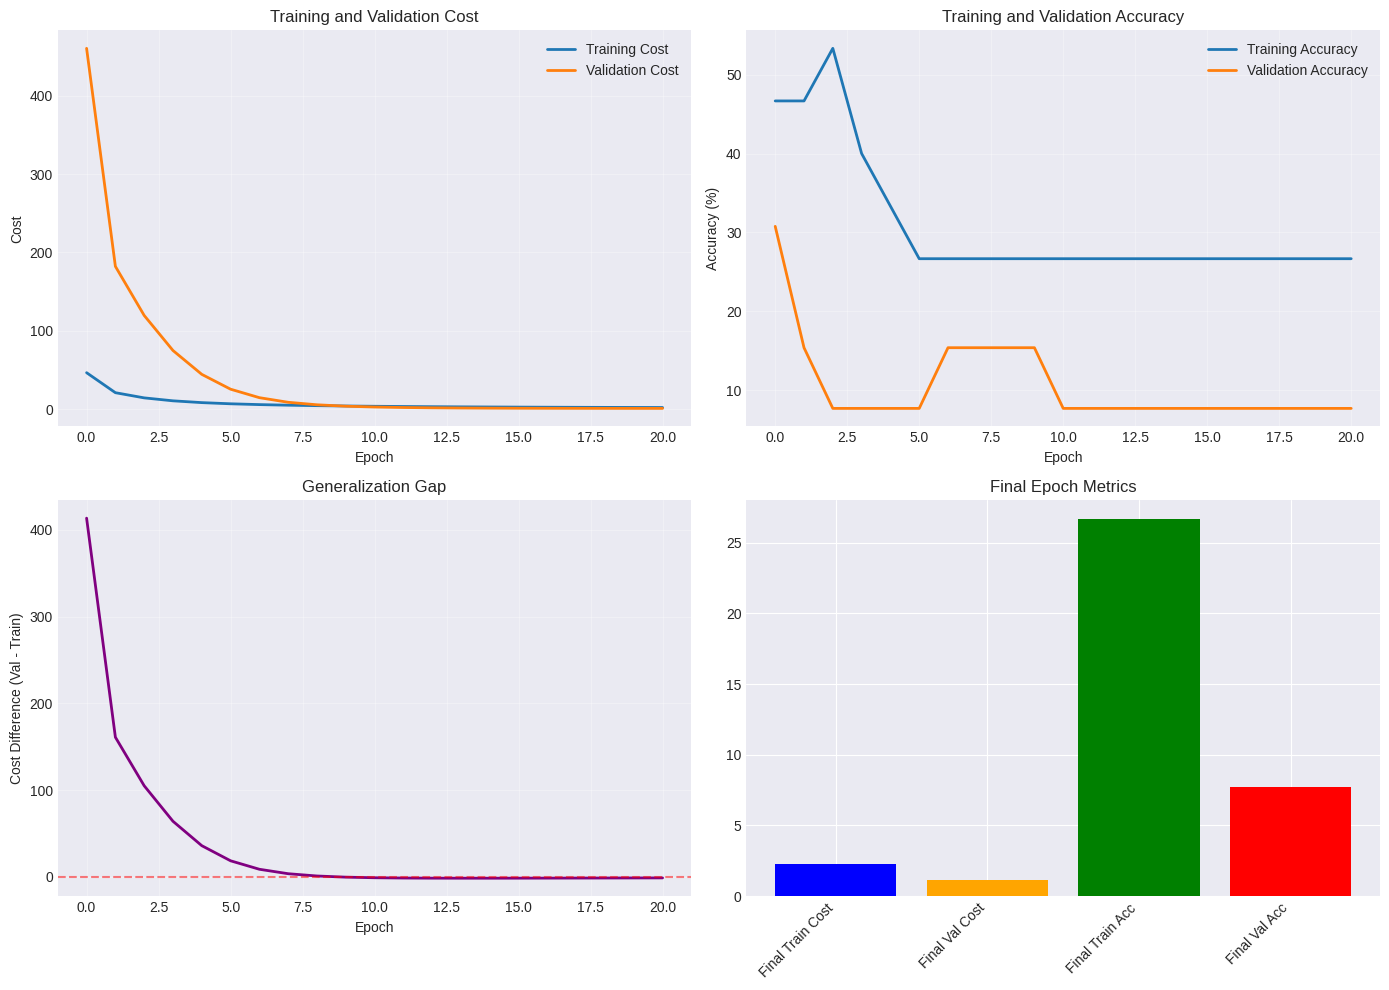

In [68]:
# Plot training history
plot_training_history(train_costs, val_costs, train_accuracies, val_accuracies)

In [76]:
def train_neural_network_with_optimizer(X_train, Y_train, X_val, Y_val, input_size, hidden_size, output_size,
                                       epochs=1000, learning_rate=0.01,
                                       activation="relu", initialization="he",
                                       optimizer="gd", lambd=0, class_weights=None, print_cost=True):
    """
    Train the neural network with different optimization algorithms
    Returns: parameters, training_history, final_metrics
    """
    parameters = initialize_parameters(input_size, hidden_size, output_size, initialization)
    train_costs = []
    val_costs = []
    train_accuracies = []
    val_accuracies = []

    # Initialize optimizer variables
    v = None
    s = None
    t = 0

    if optimizer in ["momentum", "adam"]:
        v = {}
        for l in range(1, 3):  # For 2-layer network
            v[f"dW{l}"] = np.zeros_like(parameters[f"W{l}"])
            v[f"db{l}"] = np.zeros_like(parameters[f"b{l}"])

    if optimizer == "adam":
        s = {}
        for l in range(1, 3):
            s[f"dW{l}"] = np.zeros_like(parameters[f"W{l}"])
            s[f"db{l}"] = np.zeros_like(parameters[f"b{l}"])

    best_val_accuracy = 0
    best_parameters = None
    best_val_metrics = None
    patience = 20
    patience_counter = 0
    final_epoch = 0

    print(f"Starting training for {epochs} epochs with {optimizer.upper()} optimizer...")

    for i in range(epochs):
        final_epoch = i + 1

        # Forward propagation
        A2_train, cache = forward_propagation(X_train, parameters, activation)

        # Compute training cost
        train_cost = compute_cost(Y_train, A2_train, parameters, lambd, class_weights)
        train_costs.append(train_cost)

        # Compute training accuracy
        train_predictions = (A2_train > 0.5).astype(int)
        train_accuracy = np.mean(train_predictions == Y_train) * 100
        train_accuracies.append(train_accuracy)

        # Validation
        A2_val, _ = forward_propagation(X_val, parameters, activation)
        val_cost = compute_cost(Y_val, A2_val, parameters, lambd, class_weights)
        val_costs.append(val_cost)

        val_predictions = (A2_val > 0.5).astype(int)
        val_accuracy = np.mean(val_predictions == Y_val) * 100
        val_accuracies.append(val_accuracy)

        # Calculate validation metrics
        tn_val, fp_val, fn_val, tp_val = confusion_matrix(Y_val.flatten(), val_predictions.flatten()).ravel()

        # Calculate precision, recall, f1-score for validation set
        precision_val = tp_val / (tp_val + fp_val) if (tp_val + fp_val) > 0 else 0
        recall_val = tp_val / (tp_val + fn_val) if (tp_val + fn_val) > 0 else 0
        f1_val = 2 * precision_val * recall_val / (precision_val + recall_val) if (precision_val + recall_val) > 0 else 0

        current_val_metrics = {
            'accuracy': val_accuracy,
            'precision': precision_val,
            'recall': recall_val,
            'f1_score': f1_val,
            'confusion_matrix': [[tn_val, fp_val], [fn_val, tp_val]],
            'epoch': i
        }

        # Early stopping check - using F1-score as main metric for imbalanced data
        f1_score = current_val_metrics['f1_score']
        if f1_score > best_val_accuracy:  # Using F1 as main metric
            best_val_accuracy = f1_score
            best_parameters = {k: v.copy() for k, v in parameters.items()}
            best_val_metrics = current_val_metrics.copy()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            if print_cost:
                print(f"Early stopping at epoch {i}")
                print(f"Best F1-score: {best_val_accuracy:.4f}")
            break

        # Backward propagation
        grads = backward_propagation(X_train, Y_train, parameters, cache, activation, lambd, class_weights)

        # Update parameters based on optimizer
        if optimizer == "gd":
            # Gradient Descent
            parameters = update_parameters(parameters, grads, learning_rate)

        elif optimizer == "momentum":
            # Momentum
            beta = 0.9
            for l in range(1, 3):
                v[f"dW{l}"] = beta * v[f"dW{l}"] + (1 - beta) * grads[f"dW{l}"]
                v[f"db{l}"] = beta * v[f"db{l}"] + (1 - beta) * grads[f"db{l}"]

                parameters[f"W{l}"] = parameters[f"W{l}"] - learning_rate * v[f"dW{l}"]
                parameters[f"b{l}"] = parameters[f"b{l}"] - learning_rate * v[f"db{l}"]

        elif optimizer == "adam":
            # Adam optimizer
            beta1 = 0.9
            beta2 = 0.999
            epsilon = 1e-8
            t += 1

            for l in range(1, 3):
                # Update biased first moment estimate
                v[f"dW{l}"] = beta1 * v[f"dW{l}"] + (1 - beta1) * grads[f"dW{l}"]
                v[f"db{l}"] = beta1 * v[f"db{l}"] + (1 - beta1) * grads[f"db{l}"]

                # Update biased second raw moment estimate
                s[f"dW{l}"] = beta2 * s[f"dW{l}"] + (1 - beta2) * np.square(grads[f"dW{l}"])
                s[f"db{l}"] = beta2 * s[f"db{l}"] + (1 - beta2) * np.square(grads[f"db{l}"])

                # Compute bias-corrected first moment estimate
                v_corrected_dW = v[f"dW{l}"] / (1 - np.power(beta1, t))
                v_corrected_db = v[f"db{l}"] / (1 - np.power(beta1, t))

                # Compute bias-corrected second raw moment estimate
                s_corrected_dW = s[f"dW{l}"] / (1 - np.power(beta2, t))
                s_corrected_db = s[f"db{l}"] / (1 - np.power(beta2, t))

                # Update parameters
                parameters[f"W{l}"] = parameters[f"W{l}"] - learning_rate * v_corrected_dW / (np.sqrt(s_corrected_dW) + epsilon)
                parameters[f"b{l}"] = parameters[f"b{l}"] - learning_rate * v_corrected_db / (np.sqrt(s_corrected_db) + epsilon)

        else:
            raise ValueError("Optimizer not supported. Use 'gd', 'momentum', or 'adam'")

        # Print progress
        if print_cost and i % (epochs//10) == 0 and i > 0:
            print(f"Epoch {i}:")
            print(f"  Cost: Train={train_cost:.6f}, Val={val_cost:.6f}")
            print(f"  Accuracy: Train={train_accuracy:.2f}%, Val={val_accuracy:.2f}%")
            print(f"  Val Metrics: Prec={precision_val:.4f}, Rec={recall_val:.4f}, F1={f1_val:.4f}")
            print("-" * 50)

    # Use best parameters found during training
    if best_parameters is not None:
        parameters = best_parameters
        final_metrics = best_val_metrics
    else:
        # If no best parameters were saved, use current ones
        final_metrics = current_val_metrics

    # Calculate final training metrics
    A2_train_final, _ = forward_propagation(X_train, parameters, activation)
    train_predictions_final = (A2_train_final > 0.5).astype(int)
    tn_train, fp_train, fn_train, tp_train = confusion_matrix(Y_train.flatten(), train_predictions_final.flatten()).ravel()

    train_accuracy_final = np.mean(train_predictions_final == Y_train) * 100
    precision_train = tp_train / (tp_train + fp_train) if (tp_train + fp_train) > 0 else 0
    recall_train = tp_train / (tp_train + fn_train) if (tp_train + fn_train) > 0 else 0
    f1_train = 2 * precision_train * recall_train / (precision_train + recall_train) if (precision_train + recall_train) > 0 else 0

    final_train_metrics = {
        'accuracy': train_accuracy_final,
        'precision': precision_train,
        'recall': recall_train,
        'f1_score': f1_train,
        'confusion_matrix': [[tn_train, fp_train], [fn_train, tp_train]]
    }

    # Package training history
    training_history = {
        'train_costs': train_costs,
        'val_costs': val_costs,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'epochs_trained': final_epoch,
        'train_metrics': final_train_metrics,
        'val_metrics': final_metrics
    }

    print(f"\n" + "="*60)
    print("TRAINING SUMMARY")
    print("="*60)
    print(f"Total epochs trained: {final_epoch}")
    print(f"Early stopping: {'Yes' if patience_counter >= patience else 'No'}")
    print("\nTRAINING SET METRICS (Final):")
    print(f"  Accuracy:  {train_accuracy_final:.2f}%")
    print(f"  Precision: {precision_train:.4f}")
    print(f"  Recall:    {recall_train:.4f}")
    print(f"  F1-Score:  {f1_train:.4f}")
    print(f"  Confusion Matrix:")
    print(f"    [[TN={tn_train:4d}, FP={fp_train:4d}]")
    print(f"     [FN={fn_train:4d}, TP={tp_train:4d}]]")

    print("\nVALIDATION SET METRICS (Best):")
    print(f"  Accuracy:  {final_metrics['accuracy']:.2f}%")
    print(f"  Precision: {final_metrics['precision']:.4f}")
    print(f"  Recall:    {final_metrics['recall']:.4f}")
    print(f"  F1-Score:  {final_metrics['f1_score']:.4f}")
    print(f"  Confusion Matrix:")
    cm = final_metrics['confusion_matrix']
    print(f"    [[TN={cm[0][0]:4d}, FP={cm[0][1]:4d}]")
    print(f"     [FN={cm[1][0]:4d}, TP={cm[1][1]:4d}]]")
    print("="*60)

    # ADD THIS RETURN STATEMENT
    return parameters, training_history

In [77]:
# Test the fixed function
print("="*80)
print("TESTING FIXED TRAINING FUNCTION")
print("="*80)

# Get input size from our prepared data
input_size = X_train.shape[0]
hidden_size = 32  # Smaller for testing
output_size = 1

# Train with the fixed function
trained_parameters, training_history = train_neural_network_with_optimizer(
    X_train, Y_train, X_val, Y_val,
    input_size=input_size,
    hidden_size=hidden_size,
    output_size=output_size,
    epochs=100,  # Smaller for testing
    learning_rate=0.001,
    activation="relu",
    initialization="he",
    optimizer="adam",
    lambd=0.001,
    class_weights=class_weights,
    print_cost=True
)

print(f"\n✓ Function executed successfully!")
print(f"✓ Returned parameters type: {type(trained_parameters)}")
print(f"✓ Returned training_history type: {type(training_history)}")
print(f"✓ Epochs trained: {training_history['epochs_trained']}")
print(f"✓ Training accuracy: {training_history['train_metrics']['accuracy']:.2f}%")
print(f"✓ Validation F1-score: {training_history['val_metrics']['f1_score']:.4f}")

TESTING FIXED TRAINING FUNCTION
Starting training for 100 epochs with ADAM optimizer...
Epoch 10:
  Cost: Train=70.118586, Val=590.581875
  Accuracy: Train=73.33%, Val=76.92%
  Val Metrics: Prec=0.0000, Rec=0.0000, F1=0.0000
--------------------------------------------------
Early stopping at epoch 19
Best F1-score: 0.0000

TRAINING SUMMARY
Total epochs trained: 20
Early stopping: Yes

TRAINING SET METRICS (Final):
  Accuracy:  86.67%
  Precision: 0.6667
  Recall:    0.6667
  F1-Score:  0.6667
  Confusion Matrix:
    [[TN=  11, FP=   1]
     [FN=   1, TP=   2]]

VALIDATION SET METRICS (Best):
  Accuracy:  76.92%
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000
  Confusion Matrix:
    [[TN=  10, FP=   2]
     [FN=   1, TP=   0]]

✓ Function executed successfully!
✓ Returned parameters type: <class 'dict'>
✓ Returned training_history type: <class 'dict'>
✓ Epochs trained: 20
✓ Training accuracy: 86.67%
✓ Validation F1-score: 0.0000


In [78]:
# Quick verification of what was returned
print("="*80)
print("VERIFYING RETURN VALUES")
print("="*80)

print("\n1. Parameters dictionary keys:")
for key in trained_parameters.keys():
    print(f"   {key}: shape = {trained_parameters[key].shape}")

print("\n2. Training history keys:")
for key in training_history.keys():
    if key not in ['train_metrics', 'val_metrics']:
        print(f"   {key}: {type(training_history[key])}")
        if isinstance(training_history[key], list):
            print(f"     Length: {len(training_history[key])}")
            if len(training_history[key]) > 0:
                print(f"     First value: {training_history[key][0]}")
                print(f"     Last value: {training_history[key][-1]}")

print("\n3. Training metrics:")
for metric, value in training_history['train_metrics'].items():
    if metric != 'confusion_matrix':
        print(f"   {metric}: {value}")

print("\n4. Validation metrics:")
for metric, value in training_history['val_metrics'].items():
    if metric != 'confusion_matrix':
        print(f"   {metric}: {value}")

print("\n✓ All return values verified successfully!")

VERIFYING RETURN VALUES

1. Parameters dictionary keys:
   W1: shape = (32, 29)
   W2: shape = (1, 32)
   b1: shape = (32, 1)
   b2: shape = (1, 1)

2. Training history keys:
   train_costs: <class 'list'>
     Length: 20
     First value: 135.335108998434
     Last value: 42.812021731859005
   val_costs: <class 'list'>
     Length: 20
     First value: 590.5745168359126
     Last value: 590.5885906038942
   train_accuracies: <class 'list'>
     Length: 20
     First value: 73.33333333333333
     Last value: 86.66666666666667
   val_accuracies: <class 'list'>
     Length: 20
     First value: 76.92307692307693
     Last value: 76.92307692307693
   epochs_trained: <class 'int'>

3. Training metrics:
   accuracy: 86.66666666666667
   precision: 0.6666666666666666
   recall: 0.6666666666666666
   f1_score: 0.6666666666666666

4. Validation metrics:
   accuracy: 76.92307692307693
   precision: 0.0
   recall: 0.0
   f1_score: 0
   epoch: 19

✓ All return values verified successfully!


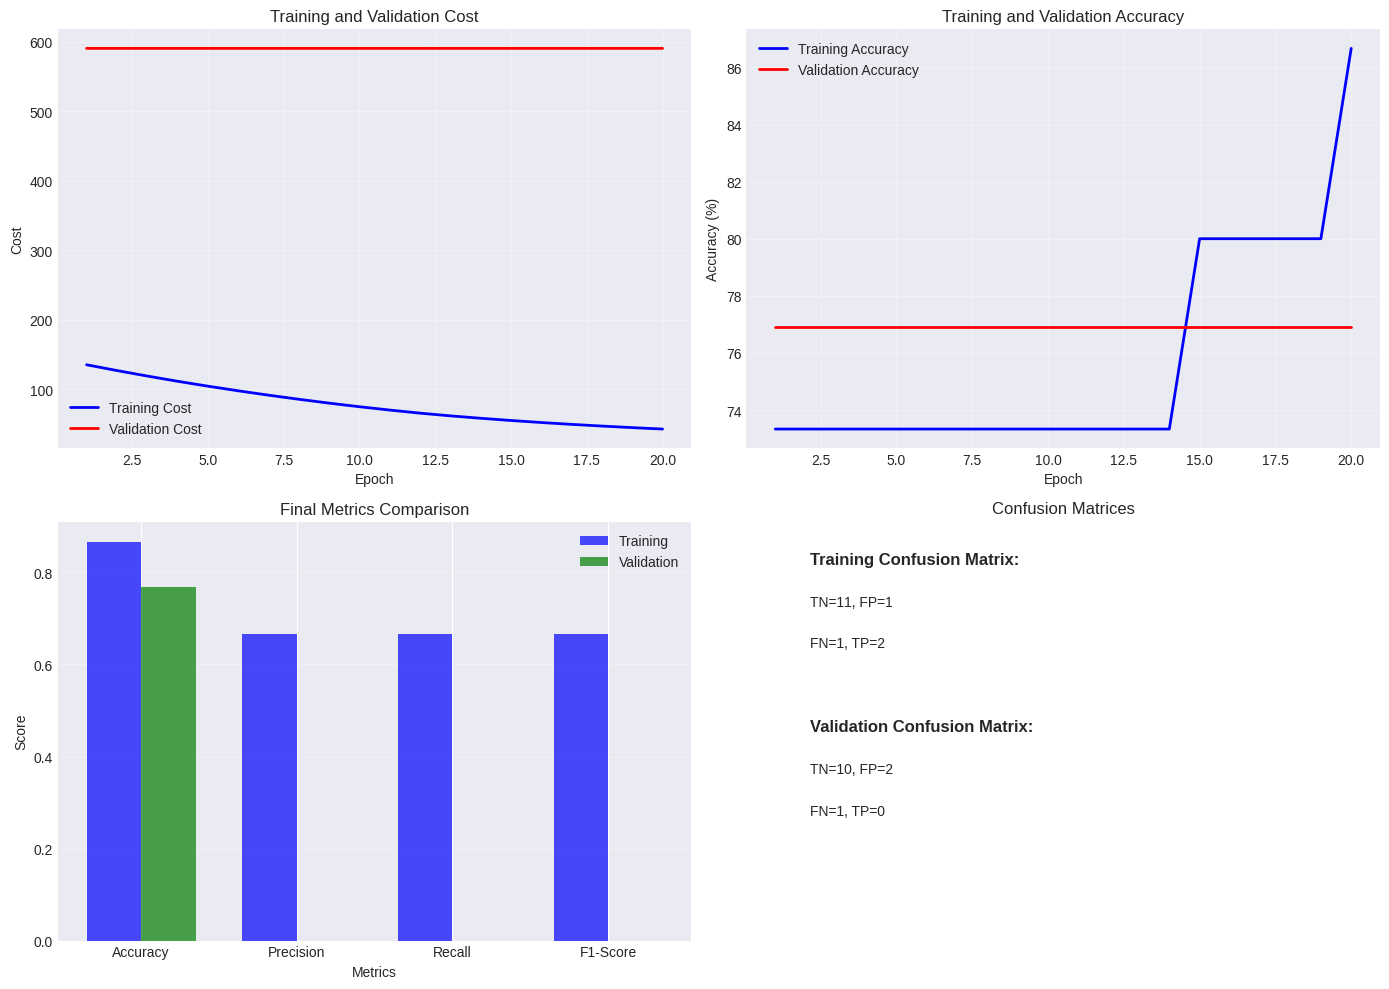

In [79]:
def plot_training_progress(training_history):
    """Plot training and validation progress"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

    # Plot costs
    epochs_range = range(1, len(training_history['train_costs']) + 1)
    ax1.plot(epochs_range, training_history['train_costs'], 'b-', label='Training Cost', linewidth=2)
    ax1.plot(epochs_range, training_history['val_costs'], 'r-', label='Validation Cost', linewidth=2)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Cost')
    ax1.set_title('Training and Validation Cost')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot accuracies
    ax2.plot(epochs_range, training_history['train_accuracies'], 'b-', label='Training Accuracy', linewidth=2)
    ax2.plot(epochs_range, training_history['val_accuracies'], 'r-', label='Validation Accuracy', linewidth=2)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot F1-score progression (if available in history)
    # Note: We don't have F1 history in the current implementation
    # You could modify the training function to store F1 history

    # Plot final metrics comparison
    train_metrics = training_history['train_metrics']
    val_metrics = training_history['val_metrics']

    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    train_values = [
        train_metrics['accuracy']/100,  # Convert from percentage
        train_metrics['precision'],
        train_metrics['recall'],
        train_metrics['f1_score']
    ]
    val_values = [
        val_metrics['accuracy']/100,
        val_metrics['precision'],
        val_metrics['recall'],
        val_metrics['f1_score']
    ]

    x = np.arange(len(metrics_names))
    width = 0.35

    ax3.bar(x - width/2, train_values, width, label='Training', color='blue', alpha=0.7)
    ax3.bar(x + width/2, val_values, width, label='Validation', color='green', alpha=0.7)
    ax3.set_xlabel('Metrics')
    ax3.set_ylabel('Score')
    ax3.set_title('Final Metrics Comparison')
    ax3.set_xticks(x)
    ax3.set_xticklabels(metrics_names)
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')

    # Plot confusion matrices
    train_cm = train_metrics['confusion_matrix']
    val_cm = val_metrics['confusion_matrix']

    ax4.text(0.1, 0.9, 'Training Confusion Matrix:', fontsize=12, fontweight='bold')
    ax4.text(0.1, 0.8, f"TN={train_cm[0][0]}, FP={train_cm[0][1]}", fontsize=10)
    ax4.text(0.1, 0.7, f"FN={train_cm[1][0]}, TP={train_cm[1][1]}", fontsize=10)

    ax4.text(0.1, 0.5, 'Validation Confusion Matrix:', fontsize=12, fontweight='bold')
    ax4.text(0.1, 0.4, f"TN={val_cm[0][0]}, FP={val_cm[0][1]}", fontsize=10)
    ax4.text(0.1, 0.3, f"FN={val_cm[1][0]}, TP={val_cm[1][1]}", fontsize=10)

    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)
    ax4.axis('off')
    ax4.set_title('Confusion Matrices')

    plt.tight_layout()
    plt.show()

# Plot the training progress
plot_training_progress(training_history)